In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
hermes_process_state = pd.read_csv('dataset/hermes_process_states.csv')
hermes_process_state.head()

,id,name,created_at,updated_at,deleted_at
0,1,goal-setting,2024-03-22 06:14:24,2024-03-22 06:14:24,NaN
1,2,tool-calling,2024-03-22 06:14:24,2024-03-22 06:14:24,NaN
2,3,generate-answer,2024-03-22 06:14:24,2024-03-22 06:14:24,NaN
3,4,validate-answer,2024-03-22 06:14:24,2024-03-22 06:14:24,NaN
4,5,tool-execution,2024-03-25 07:58:10,2024-03-25 07:58:10,NaN


In [3]:
knowledge_tools = pd.read_csv('dataset/knowledge_tools.csv')
knowledge_tools.head()

,tool_id,tool_name,tool_status
0,1,get_property_information,1
1,2,get_booking_details,1
2,3,get_conversation_with_guest,1
3,4,check_property_calendar,1
4,5,get_alternative_property,1


In [4]:
knowledge_analysis_categories = pd.read_csv('dataset/knowledge_analysis_categories.csv')

knowledge_analysis_categories.sort_values(by='escalation_status', ascending=False, inplace=True)
knowledge_analysis_categories

,category_id,category,description,whitelist,escalation_status,special_instructions,category_status
8,9,feedback_negative,For messages that contains bad sentiment like ...,0,4,NaN,1
54,68,query_pricing_strategy,For discussions regarding the pricing strategi...,0,3,NaN,1
61,75,unidentified_image,For messages that contains an undescribed desc...,0,3,NaN,1
57,71,request_partnership,For messages that explore new partnership oppo...,0,3,NaN,1
58,72,query_technical_issue,For requests for assistance with the online bo...,0,3,NaN,1
...,...,...,...,...,...,...,...
33,46,request_scooter_or_bike,For messages that requesting or inquiring abou...,1,1,Forward the user request to the onsite staff.,1
34,47,query_check_out_time,For messages that asking about the check out t...,1,1,Check for the information in get property info...,1
36,49,guest_additional_contact,For messages that contains additional contact ...,1,1,Forward the guest request to the onsite staff.,1
37,50,query_address,For messages asking specific about the propert...,1,1,NaN,1


In [5]:
hermes_process_logs = pd.read_csv('dataset/hermes_process_logs.csv')
hermes_process_logs.head()

,id,user_id,agent_name,last_message,final_answer,escalation_status,prompt_arguments,prompt_response,state_id,state_name,...,category_name,category_description,category_summary,category_actions,tool_id,tool_name,tool_arguments,tool_response,created_at,updated_at
0,13341,6282297999004@c.us,Hermes,Noted Mbak,"Good morning, I've received the photos and the...",1.0,"{""user"": ""partner-6282297999004@c.us-20240423-...","{""data"": {""cost"": 56.625, ""completion"": {""inde...",1.0,goal-setting,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-23 00:03:20,2024-04-23 00:04:56
1,13341,6282297999004@c.us,Hermes,Noted Mbak,"Good morning, I've received the photos and the...",1.0,"{""user"": ""partner-6282297999004@c.us-20240423""...","{""data"": {""cost"": 995.1, ""completion"": {""index...",3.0,generate-answer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-23 00:03:20,2024-04-23 00:04:56
2,13341,6282297999004@c.us,Hermes,Noted Mbak,"Good morning, I've received the photos and the...",1.0,"{""user"": ""partner-6282297999004@c.us-20240423""...","{""data"": {""cost"": 60.465, ""completion"": {""inde...",4.0,validate-answer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-23 00:03:20,2024-04-23 00:04:56
3,13342,HMMWZJPTAK,Hosting,"Hi, \nCan you please respond to my request abo...","Hi Sergey,\n\nThank you for reaching out with ...",2.0,"{""user"": ""guest-confirmed-HMMWZJPTAK-202404230...","{""data"": {""cost"": 39.1575, ""completion"": {""ind...",1.0,goal-setting,...,request_extension,For request messages that intent to extend the...,Sergey has requested a response regarding exte...,Handle the request to extend the booking durat...,4.0,check_property_calendar,"{""room_id"": 397675, ""check_in_date"": ""2024-04-...","{'information': ""Currently, the property that ...",2024-04-23 00:03:46,2024-04-23 00:04:24
4,13342,HMMWZJPTAK,Hosting,"Hi, \nCan you please respond to my request abo...","Hi Sergey,\n\nThank you for reaching out with ...",2.0,"{""user"": ""guest-confirmed-HMMWZJPTAK"", ""model""...","{""data"": {""cost"": 33.6825, ""completion"": {""ind...",2.0,tool-calling,...,request_extension,For request messages that intent to extend the...,Sergey has requested a response regarding exte...,Handle the request to extend the booking durat...,4.0,check_property_calendar,"{""room_id"": 397675, ""check_in_date"": ""2024-04-...","{'information': ""Currently, the property that ...",2024-04-23 00:03:46,2024-04-23 00:04:24


In [6]:
hermes_process_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103472 entries, 0 to 103471
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    103472 non-null  int64  
 1   user_id               103472 non-null  object 
 2   agent_name            103472 non-null  object 
 3   last_message          103350 non-null  object 
 4   final_answer          100469 non-null  object 
 5   escalation_status     103177 non-null  float64
 6   prompt_arguments      102772 non-null  object 
 7   prompt_response       102772 non-null  object 
 8   state_id              102772 non-null  float64
 9   state_name            102772 non-null  object 
 10  category_id           81872 non-null   float64
 11  category_name         81872 non-null   object 
 12  category_description  81872 non-null   object 
 13  category_summary      81872 non-null   object 
 14  category_actions      81863 non-null   object 
 15  

In [7]:
# check null values
hermes_process_logs.isnull().sum()

id                          0
user_id                     0
agent_name                  0
last_message              122
final_answer             3003
escalation_status         295
prompt_arguments          700
prompt_response           700
state_id                  700
state_name                700
category_id             21600
category_name           21600
category_description    21600
category_summary        21600
category_actions        21609
tool_id                 23552
tool_name               23552
tool_arguments          23552
tool_response           23746
created_at                  0
updated_at                  0
dtype: int64

In [8]:
# from onsite tool_responce column, there is two type of response
# 1. Message has been sent to staff
# 2. Message not sent because

# Function to determine if message was sent or not
def extract_response_type(response):
    if "Message has been sent to staff" in response:
        return "Sent"
    elif "Message was not sent because" in response:
        return "Not Sent"
    else:
        return "Unknown"

In [9]:
import ast

# Function to extract 'information' from the message
def extract_information(message):
    try:
        message_dict = ast.literal_eval(message)
        return message_dict.get('information', '')
    except (ValueError, SyntaxError):
        return ''

In [10]:
import re

# Define the list of common greetings
# greetings = [
#     "Hi", "Hello", "Dear", "Bonjour", "Halo",
#     "Good morning", "Good afternoon", "Good evening"
# ]
greetings = [
    "Hi", "Hello", "Dear", "Bonjour", "Halo",
    "Bonsoir", "Ciao", "Cher", "Liebe", "Goedenavond",
    "Hej", "Selamat", "Merhaba", "Hai", "Guten Morgen",
    "Good morning", "Good afternoon", "Good evening"
]

# Create the regex pattern
pattern = re.compile(r"(?:" + "|".join(greetings) + r")\s+([^\n,]+)")

# Function to extract names from messages
def extract_name(message):
    match = pattern.search(message)
    if match:
        return match.group(1).strip()
    return None

# uji coba 1

## tes category that null

In [11]:
# temp dataset where category is null dan agentname is Hemres
tes = hermes_process_logs[(hermes_process_logs['category_id'].isnull()) & (hermes_process_logs['agent_name'] == 'Hermes')]
tes.drop(columns=['prompt_arguments', 'prompt_response', 'created_at', 'updated_at','state_id','state_name'], inplace=True)

C:\Users\Mochammad Dzahwan\AppData\Local\Temp\ipykernel_21768\3470310484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tes.drop(columns=['prompt_arguments', 'prompt_response', 'created_at', 'updated_at','state_id','state_name'], inplace=True)


In [12]:
# remove duplicate rows from tes
tes.duplicated().sum()
tes.drop_duplicates(inplace=True)


C:\Users\Mochammad Dzahwan\AppData\Local\Temp\ipykernel_21768\3092947570.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tes.drop_duplicates(inplace=True)


## cek cek column

In [13]:
# agent name unique values and count
hermes_process_logs['agent_name'].value_counts()

agent_name
Hosting         65607
Reservation     18662
BVGO             8299
Hermes           8008
Ask Anything     2896
Name: count, dtype: int64

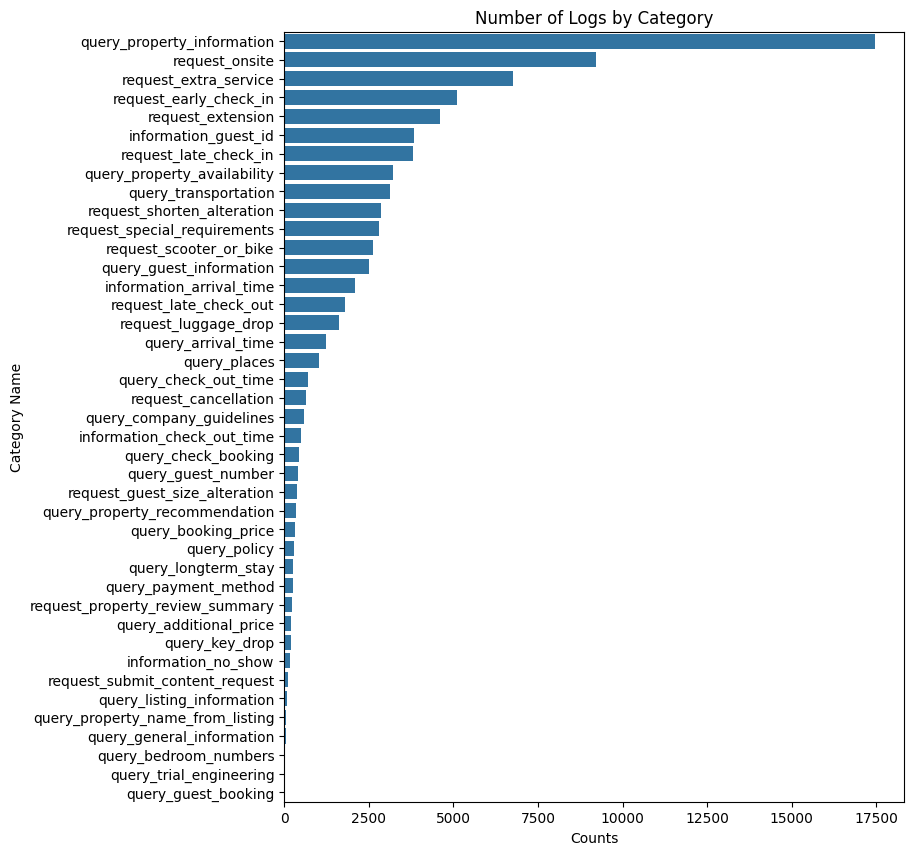

In [14]:
# groupby category name and count the number of logs horizontally
category_counts = hermes_process_logs.groupby('category_name').size().reset_index(name='counts')
category_counts = category_counts.sort_values('counts', ascending=False)

# Plot the category counts vertically
plt.figure(figsize=(8, 10))  # Adjust figure size as needed
sns.barplot(x='counts', y='category_name', data=category_counts, orient='h')
plt.xlabel('Counts')
plt.ylabel('Category Name')
plt.title('Number of Logs by Category')
plt.show()



In [15]:
# copy hermes process logs to a new dataframe
process_logs = hermes_process_logs.copy()

# # drop all null values
# process_logs.dropna(inplace=True)

process_logs['state_name'].value_counts()

#process_logs['category_name'].value_counts().plot(kind='bar')

state_name
generate-answer    29381
validate-answer    29055
goal-setting       21566
tool-calling       17708
tool-execution      5062
Name: count, dtype: int64

## check onsite request

In [16]:
# get data only for category onsite
onsite = hermes_process_logs[hermes_process_logs['category_name'] == 'request_onsite']
onsite

,id,user_id,agent_name,last_message,final_answer,escalation_status,prompt_arguments,prompt_response,state_id,state_name,...,category_name,category_description,category_summary,category_actions,tool_id,tool_name,tool_arguments,tool_response,created_at,updated_at
98,13357,HM43CK89JC,Hosting,"Hi, there’s ants in the number 3 bathroom and ...","Hi Bailey,\n\nI'm sorry to hear about the issu...",1.0,"{""user"": ""guest-confirmed-HM43CK89JC-202404230...","{""data"": {""cost"": 38.26500000000001, ""completi...",1.0,goal-setting,...,request_onsite,For guest requests related to amenities such a...,Bailey Heap reported encountering ants in the ...,Assist with on-site issues regarding ant prese...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HM43CK89JC"", ""guest_request_in...",{'information': 'Message has been sent to staf...,2024-04-23 00:42:36,2024-04-23 00:43:17
99,13357,HM43CK89JC,Hosting,"Hi, there’s ants in the number 3 bathroom and ...","Hi Bailey,\n\nI'm sorry to hear about the issu...",1.0,"{""user"": ""guest-confirmed-HM43CK89JC"", ""model""...","{""data"": {""cost"": 35.3175, ""completion"": {""ind...",2.0,tool-calling,...,request_onsite,For guest requests related to amenities such a...,Bailey Heap reported encountering ants in the ...,Assist with on-site issues regarding ant prese...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HM43CK89JC"", ""guest_request_in...",{'information': 'Message has been sent to staf...,2024-04-23 00:42:36,2024-04-23 00:43:17
100,13357,HM43CK89JC,Hosting,"Hi, there’s ants in the number 3 bathroom and ...","Hi Bailey,\n\nI'm sorry to hear about the issu...",1.0,"{""user"": null, ""model"": ""gpt-3.5-turbo-1106"", ...","{""data"": {""cost"": 3.0900000000000003, ""complet...",5.0,tool-execution,...,request_onsite,For guest requests related to amenities such a...,Bailey Heap reported encountering ants in the ...,Assist with on-site issues regarding ant prese...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HM43CK89JC"", ""guest_request_in...",{'information': 'Message has been sent to staf...,2024-04-23 00:42:36,2024-04-23 00:43:17
101,13357,HM43CK89JC,Hosting,"Hi, there’s ants in the number 3 bathroom and ...","Hi Bailey,\n\nI'm sorry to hear about the issu...",1.0,"{""user"": ""guest-confirmed-HM43CK89JC"", ""model""...","{""data"": {""cost"": 736.35, ""completion"": {""inde...",3.0,generate-answer,...,request_onsite,For guest requests related to amenities such a...,Bailey Heap reported encountering ants in the ...,Assist with on-site issues regarding ant prese...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HM43CK89JC"", ""guest_request_in...",{'information': 'Message has been sent to staf...,2024-04-23 00:42:36,2024-04-23 00:43:17
102,13357,HM43CK89JC,Hosting,"Hi, there’s ants in the number 3 bathroom and ...","Hi Bailey,\n\nI'm sorry to hear about the issu...",1.0,"{""user"": ""guest-confirmed-HM43CK89JC"", ""model""...","{""data"": {""cost"": 46.8525, ""completion"": {""ind...",4.0,validate-answer,...,request_onsite,For guest requests related to amenities such a...,Bailey Heap reported encountering ants in the ...,Assist with on-site issues regarding ant prese...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HM43CK89JC"", ""guest_request_in...",{'information': 'Message has been sent to staf...,2024-04-23 00:42:36,2024-04-23 00:43:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103441,29305,HMZFBTPSAR,Hosting,"Adel reacted to Bayu & Wayana’s message ""Hi Ad...","Hi Adel,\n\nGreat to see your positive reactio...",2.0,"{""user"": ""guest-confirmed-HMZFBTPSAR-202405230...","{""data"": {""cost"": 41.872499999999995, ""complet...",1.0,goal-setting,...,request_onsite,For guest requests related to amenities such a...,Adel acknowledged the check-in and airport pic...,Addressing additional questions or needs relat...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HMZFBTPSAR"", ""guest_request_in...",{'information': 

In [17]:
onsite.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9206 entries, 98 to 103445
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9206 non-null   int64  
 1   user_id               9206 non-null   object 
 2   agent_name            9206 non-null   object 
 3   last_message          9181 non-null   object 
 4   final_answer          9105 non-null   object 
 5   escalation_status     9200 non-null   float64
 6   prompt_arguments      9206 non-null   object 
 7   prompt_response       9206 non-null   object 
 8   state_id              9206 non-null   float64
 9   state_name            9206 non-null   object 
 10  category_id           9206 non-null   float64
 11  category_name         9206 non-null   object 
 12  category_description  9206 non-null   object 
 13  category_summary      9206 non-null   object 
 14  category_actions      9206 non-null   object 
 15  tool_id               9

In [18]:
# convert created_at to datetime
onsite['created_at'] = pd.to_datetime(onsite['created_at'])
# convert updated_at to datetime
onsite['updated_at'] = pd.to_datetime(onsite['updated_at'])
onsite.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9206 entries, 98 to 103445
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9206 non-null   int64         
 1   user_id               9206 non-null   object        
 2   agent_name            9206 non-null   object        
 3   last_message          9181 non-null   object        
 4   final_answer          9105 non-null   object        
 5   escalation_status     9200 non-null   float64       
 6   prompt_arguments      9206 non-null   object        
 7   prompt_response       9206 non-null   object        
 8   state_id              9206 non-null   float64       
 9   state_name            9206 non-null   object        
 10  category_id           9206 non-null   float64       
 11  category_name         9206 non-null   object        
 12  category_description  9206 non-null   object        
 13  category_summary    

C:\Users\Mochammad Dzahwan\AppData\Local\Temp\ipykernel_21768\2559556430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onsite['created_at'] = pd.to_datetime(onsite['created_at'])
C:\Users\Mochammad Dzahwan\AppData\Local\Temp\ipykernel_21768\2559556430.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onsite['updated_at'] = pd.to_datetime(onsite['updated_at'])


In [19]:
onsite['escalation_status'].value_counts()

escalation_status
2.0    7471
3.0    1198
1.0     531
Name: count, dtype: int64

In [20]:
# show 1 example of data where escalation status is 2
onsite[onsite['escalation_status'] == 2]['category_summary'].iloc[0]

'Guest needs assistance in arranging delivery of a small pearl set in Silver from Yan Yan Silver to Kembang Kuning Bungalows.'

In [21]:
# check onsite final answer that null
onsite_final_answer_null = onsite[onsite['final_answer'].isnull()]
# check the for specific id
onsite_final_answer_null.iloc[8]

id                                                                  22710
user_id                                                        HMRJAAJSBY
agent_name                                                        Hosting
last_message                                       Where are these people
final_answer                                                          NaN
escalation_status                                                     3.0
prompt_arguments        {"user": "guest-confirmed-HMRJAAJSBY-202405100...
prompt_response         {"data": {"cost": 61.875, "completion": {"inde...
state_id                                                              1.0
state_name                                                   goal-setting
category_id                                                          29.0
category_name                                              request_onsite
category_description    For guest requests related to amenities such a...
category_summary        The guest is e

## check null value

In [22]:
# Display the columns with null values and their counts
null_counts = onsite.isnull().sum()
print(null_counts[null_counts > 0])

last_message          25
final_answer         101
escalation_status      6
tool_id               92
tool_name             92
tool_arguments        92
tool_response         95
dtype: int64


In [23]:
# check on each row if the final_answer is null and escalation_status is also null
onsite[(onsite['final_answer'].isnull()) & (onsite['escalation_status'].isnull())]

,id,user_id,agent_name,last_message,final_answer,escalation_status,prompt_arguments,prompt_response,state_id,state_name,...,category_name,category_description,category_summary,category_actions,tool_id,tool_name,tool_arguments,tool_response,created_at,updated_at
72490,25117,HMQPNXDQBW,Hosting,"Hello, we have arrived at the property but the...",NaN,NaN,"{""user"": ""guest-confirmed-HMQPNXDQBW-202405141...","{""data"": {""cost"": 43.395, ""completion"": {""inde...",1.0,goal-setting,...,request_onsite,For guest requests related to amenities such a...,Jenae has arrived at the property and is exper...,Assist with power and water issues at the prop...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HMQPNXDQBW"", ""guest_request_in...",{'information': 'Message has been sent to staf...,2024-05-14 07:50:34,2024-05-14 07:50:34
72491,25117,HMQPNXDQBW,Hosting,"Hello, we have arrived at the property but the...",NaN,NaN,"{""user"": ""guest-confirmed-HMQPNXDQBW-202405141...","{""data"": {""cost"": 43.395, ""completion"": {""inde...",1.0,goal-setting,...,request_onsite,For guest requests related to amenities such a...,Jenae has arrived at the property and is exper...,Assist with power and water issues at the prop...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HMQPNXDQBW"", ""guest_request_in...",NaN,2024-05-14 07:50:34,2024-05-14 07:50:34
72492,25117,HMQPNXDQBW,Hosting,"Hello, we have arrived at the property but the...",NaN,NaN,"{""user"": ""guest-confirmed-HMQPNXDQBW"", ""model""...","{""data"": {""cost"": 41.475, ""completion"": {""inde...",2.0,tool-calling,...,request_onsite,For guest requests related to amenities such a...,Jenae has arrived at the property and is exper...,Assist with power and water issues at the prop...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HMQPNXDQBW"", ""guest_request_in...",{'information': 'Message has been sent to staf...,2024-05-14 07:50:34,2024-05-14 07:50:34
72493,25117,HMQPNXDQBW,Hosting,"Hello, we have arrived at the property but the...",NaN,NaN,"{""user"": ""guest-confirmed-HMQPNXDQBW"", ""model""...","{""data"": {""cost"": 41.475, ""completion"": {""inde...",2.0,tool-calling,...,request_onsite,For guest requests related to amenities such a...,Jenae has arrived at the property and is exper...,Assist with power and water issues at the prop...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HMQPNXDQBW"", ""guest_request_in...",NaN,2024-05-14 07:50:34,2024-05-14 07:50:34
72494,25117,HMQPNXDQBW,Hosting,"Hello, we have arrived at the property but the...",NaN,NaN,"{""user"": null, ""model"": ""gpt-3.5-turbo-0125"", ...","{""data"": {""cost"": 2.5575, ""completion"": {""inde...",5.0,tool-execution,...,request_onsite,For guest requests related to amenities such a...,Jenae has arrived at the property and is exper...,Assist with power and water issues at the prop...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HMQPNXDQBW"", ""guest_request_in...",{'information': 'Message has been sent to staf...,2024-05-14 07:50:34,2024-05-14 07:50:34
72495,25117,HMQPNXDQBW,Hosting,"Hello, we have arrived at the property but the...",NaN,NaN,"{""user"": null, ""model"": ""gpt-3.5-turbo-0125"", ...","{""data"": {""cost"": 2.5575, ""completion"": {""inde...",5.0,tool-execution,...,request_onsite,For guest requests related to amenities such a...,Jenae has arrived at the property and is exper...,Assist with power and water issues at the prop...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HMQPNXDQBW"", ""guest_request_in...",NaN,2024-05-14 07:50:34,2024-05-14 07:50:34


In [24]:
# count unique id
onsite['id'].nunique()

1051

In [25]:
onsite['user_id'].nunique()

550

In [26]:
# count the number of logs for each user_id
user_counts = onsite['user_id'].value_counts().reset_index(name='counts')
user_counts = user_counts.sort_values('counts', ascending=False)

# show the top 10 users with the most logs
user_counts.head(10)

,user_id,counts
0,HM49ZD3JBF,143
1,HM8KCP8M4F,90
2,HMFQ93NB45,85
3,HM8AKS2FTC,79
4,HM2B8SWY5M,75
5,HM5YFWWHSN,73
6,HMRAK4EHY4,69
7,HMRJAAJSBY,68
8,HMHM25FHYJ,64
9,HMKWX8H22E,63


## check response send or not send.

In [27]:
# Ensure the 'tool_response' column is filled with empty strings where there are NaNs
onsite.loc[:,'tool_response'] = onsite['tool_response'].fillna('')

# Apply function to extract response type, and use .loc to avoid SettingWithCopyWarning
onsite = onsite.copy()
onsite.loc[:,'response_type'] = onsite['tool_response'].apply(extract_response_type)

# Count occurrences
sent_count = onsite[onsite['response_type'] == 'Sent'].shape[0]
not_sent_count = onsite[onsite['response_type'] == 'Not Sent'].shape[0]

print("Sent Count:", sent_count)
print("Not Sent Count:", not_sent_count)

Sent Count: 5748
Not Sent Count: 3091


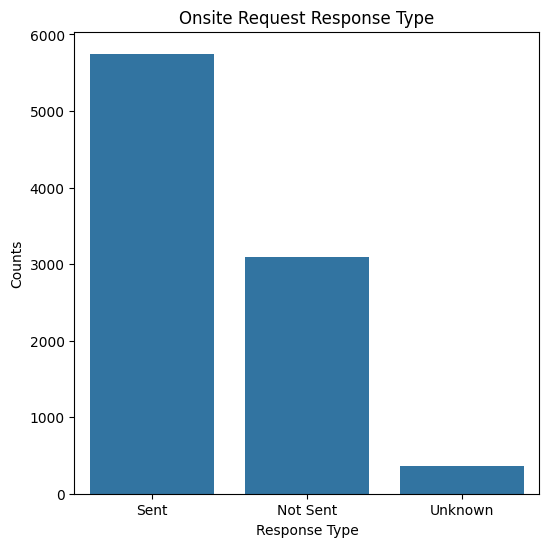

In [28]:
# Plot the response type counts
plt.figure(figsize=(6, 6))
sns.countplot(x='response_type', data=onsite)
plt.xlabel('Response Type')
plt.ylabel('Counts')
plt.title('Onsite Request Response Type')
plt.show()

In [29]:
# Average response time for sent requests
onsite_sent = onsite[onsite['response_type'] == 'Sent']
onsite_sent.loc[:,'response_time'] = (onsite_sent['updated_at'] - onsite_sent['created_at']).dt.total_seconds()
average_response_time = onsite_sent['response_time'].mean()

# Print counts
print("Sent Count:", sent_count)
print("Not Sent Count:", not_sent_count)
print(f"Average Response Time for Sent Requests: {average_response_time:.2f} seconds")

Sent Count: 5748
Not Sent Count: 3091
Average Response Time for Sent Requests: 38.85 seconds


C:\Users\Mochammad Dzahwan\AppData\Local\Temp\ipykernel_21768\2108703357.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onsite_sent.loc[:,'response_time'] = (onsite_sent['updated_at'] - onsite_sent['created_at']).dt.total_seconds()


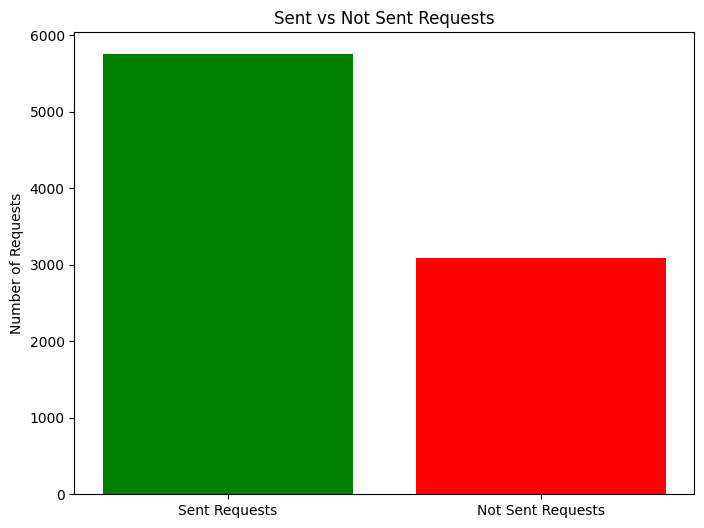

In [30]:
# Bar chart for sent vs not sent requests
plt.figure(figsize=(8, 6))
plt.bar(['Sent Requests', 'Not Sent Requests'], [sent_count, not_sent_count], color=['green', 'red'])
plt.title('Sent vs Not Sent Requests')
plt.ylabel('Number of Requests')
plt.show()


In [31]:
# Recommendations
success_rate = (sent_count / (sent_count + not_sent_count)) * 100
print(f"Success Rate: {success_rate:.2f}%")
if success_rate < 90:
    print("Recommendation: Investigate the causes of unsent requests and improve system reliability.")
else:
    print("System is performing well with a high success rate.")

Success Rate: 65.03%
Recommendation: Investigate the causes of unsent requests and improve system reliability.


## check some reqeust

Text(0.5, 1.0, 'Onsite Request State Counts')

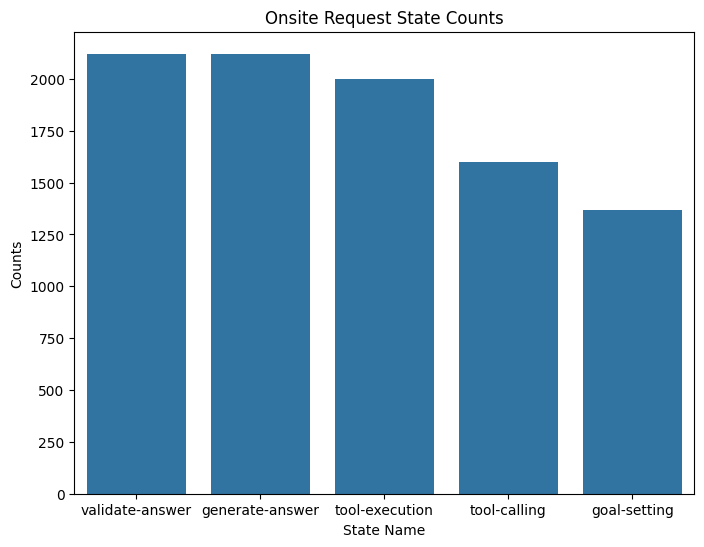

In [32]:
# from onsite count and group by state_name
state_counts = onsite['state_name'].value_counts().reset_index(name='counts')
state_counts = state_counts.sort_values('counts', ascending=False)

# Plot the state counts
plt.figure(figsize=(8, 6))
sns.barplot(y='counts', x='state_name', data=state_counts)
plt.ylabel('Counts')
plt.xlabel('State Name')
plt.title('Onsite Request State Counts')

In [33]:
# find all log for user_id
onsite_user = onsite[onsite['user_id'] ==  'HMHWNXDWSD']

# group by state_name and send/not send
state_response_counts = onsite_user.groupby(['state_name', 'response_type']).size().reset_index(name='counts')
state_response_counts = state_response_counts.sort_values('counts', ascending=False)
state_response_counts

,state_name,response_type,counts
0,generate-answer,Not Sent,4
4,validate-answer,Not Sent,4
1,goal-setting,Not Sent,2
2,tool-calling,Not Sent,2
3,tool-execution,Not Sent,2


In [34]:
# get all dataframe where response type is not sent
not_sent = onsite[onsite['response_type'] == 'Not Sent']
not_sent.head()

,id,user_id,agent_name,last_message,final_answer,escalation_status,prompt_arguments,prompt_response,state_id,state_name,...,category_description,category_summary,category_actions,tool_id,tool_name,tool_arguments,tool_response,created_at,updated_at,response_type
133,13363,HMHWNXDWSD,Hosting,Hallo leider kam niemand im mich abzuholen. Ic...,"Dear Laura,\n\nI'm contacting our on-site staf...",1.0,"{""user"": ""guest-confirmed-HMHWNXDWSD-202404230...","{""data"": {""cost"": 65.13000000000001, ""completi...",1.0,goal-setting,...,For guest requests related to amenities such a...,Laura is inquiring about the absence of the pi...,Address Laura's concern about the missed pick-...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HMHWNXDWSD"", ""guest_request_in...",{'information': 'Message was not sent because ...,2024-04-23 00:54:17,2024-04-23 00:54:49,Not Sent
134,13363,HMHWNXDWSD,Hosting,Hallo leider kam niemand im mich abzuholen. Ic...,"Dear Laura,\n\nI'm contacting our on-site staf...",1.0,"{""user"": ""guest-confirmed-HMHWNXDWSD"", ""model""...","{""data"": {""cost"": 62.227500000000006, ""complet...",2.0,tool-calling,...,For guest requests related to amenities such a...,Laura is inquiring about the absence of the pi...,Address Laura's concern about the missed pick-...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HMHWNXDWSD"", ""guest_request_in...",{'information': 'Message was not sent because ...,2024-04-23 00:54:17,2024-04-23 00:54:49,Not Sent
135,13363,HMHWNXDWSD,Hosting,Hallo leider kam niemand im mich abzuholen. Ic...,"Dear Laura,\n\nI'm contacting our on-site staf...",1.0,"{""user"": null, ""model"": ""gpt-3.5-turbo-1106"", ...","{""data"": {""cost"": 5.985, ""completion"": {""index...",5.0,tool-execution,...,For guest requests related to amenities such a...,Laura is inquiring about the absence of the pi...,Address Laura's concern about the missed pick-...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HMHWNXDWSD"", ""guest_request_in...",{'information': 'Message was not sent because ...,2024-04-23 00:54:17,2024-04-23 00:54:49,Not Sent
136,13363,HMHWNXDWSD,Hosting,Hallo leider kam niemand im mich abzuholen. Ic...,"Dear Laura,\n\nI'm contacting our on-site staf...",1.0,"{""user"": ""guest-confirmed-HMHWNXDWSD"", ""model""...","{""data"": {""cost"": 1237.05, ""completion"": {""ind...",3.0,generate-answer,...,For guest requests related to amenities such a...,Laura is inquiring about the absence of the pi...,Address Laura's concern about the missed pick-...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HMHWNXDWSD"", ""guest_request_in...",{'information': 'Message was not sent because ...,2024-04-23 00:54:17,2024-04-23 00:54:49,Not Sent
137,13363,HMHWNXDWSD,Hosting,Hallo leider kam niemand im mich abzuholen. Ic...,"Dear Laura,\n\nI'm contacting our on-site staf...",1.0,"{""user"": ""guest-confirmed-HMHWNXDWSD"", ""model""...","{""data"": {""cost"": 72.1425, ""completion"": {""ind...",4.0,validate-answer,...,For guest requests related to amenities such a...,Laura is inquiring about the absence of the pi...,Address Laura's concern about the missed pick-...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HMHWNXDWSD"", ""guest_request_in...",{'information': 'Message was not sent because ...,2024-04-23 00:54:17,2024-04-23 00:54:49,Not Sent


In [35]:
# create new column information and apply the function
not_sent.loc[:,'information'] = not_sent['tool_response'].apply(extract_information)

# Display the first few rows of the updated DataFrame
not_sent.head()


C:\Users\Mochammad Dzahwan\AppData\Local\Temp\ipykernel_21768\1727064341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_sent.loc[:,'information'] = not_sent['tool_response'].apply(extract_information)


,id,user_id,agent_name,last_message,final_answer,escalation_status,prompt_arguments,prompt_response,state_id,state_name,...,category_summary,category_actions,tool_id,tool_name,tool_arguments,tool_response,created_at,updated_at,response_type,information
133,13363,HMHWNXDWSD,Hosting,Hallo leider kam niemand im mich abzuholen. Ic...,"Dear Laura,\n\nI'm contacting our on-site staf...",1.0,"{""user"": ""guest-confirmed-HMHWNXDWSD-202404230...","{""data"": {""cost"": 65.13000000000001, ""completi...",1.0,goal-setting,...,Laura is inquiring about the absence of the pi...,Address Laura's concern about the missed pick-...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HMHWNXDWSD"", ""guest_request_in...",{'information': 'Message was not sent because ...,2024-04-23 00:54:17,2024-04-23 00:54:49,Not Sent,Message was not sent because it has been sent ...
134,13363,HMHWNXDWSD,Hosting,Hallo leider kam niemand im mich abzuholen. Ic...,"Dear Laura,\n\nI'm contacting our on-site staf...",1.0,"{""user"": ""guest-confirmed-HMHWNXDWSD"", ""model""...","{""data"": {""cost"": 62.227500000000006, ""complet...",2.0,tool-calling,...,Laura is inquiring about the absence of the pi...,Address Laura's concern about the missed pick-...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HMHWNXDWSD"", ""guest_request_in...",{'information': 'Message was not sent because ...,2024-04-23 00:54:17,2024-04-23 00:54:49,Not Sent,Message was not sent because it has been sent ...
135,13363,HMHWNXDWSD,Hosting,Hallo leider kam niemand im mich abzuholen. Ic...,"Dear Laura,\n\nI'm contacting our on-site staf...",1.0,"{""user"": null, ""model"": ""gpt-3.5-turbo-1106"", ...","{""data"": {""cost"": 5.985, ""completion"": {""index...",5.0,tool-execution,...,Laura is inquiring about the absence of the pi...,Address Laura's concern about the missed pick-...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HMHWNXDWSD"", ""guest_request_in...",{'information': 'Message was not sent because ...,2024-04-23 00:54:17,2024-04-23 00:54:49,Not Sent,Message was not sent because it has been sent ...
136,13363,HMHWNXDWSD,Hosting,Hallo leider kam niemand im mich abzuholen. Ic...,"Dear Laura,\n\nI'm contacting our on-site staf...",1.0,"{""user"": ""guest-confirmed-HMHWNXDWSD"", ""model""...","{""data"": {""cost"": 1237.05, ""completion"": {""ind...",3.0,generate-answer,...,Laura is inquiring about the absence of the pi...,Address Laura's concern about the missed pick-...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HMHWNXDWSD"", ""guest_request_in...",{'information': 'Message was not sent because ...,2024-04-23 00:54:17,2024-04-23 00:54:49,Not Sent,Message was not sent because it has been sent ...
137,13363,HMHWNXDWSD,Hosting,Hallo leider kam niemand im mich abzuholen. Ic...,"Dear Laura,\n\nI'm contacting our on-site staf...",1.0,"{""user"": ""guest-confirmed-HMHWNXDWSD"", ""model""...","{""data"": {""cost"": 72.1425, ""completion"": {""ind...",4.0,validate-answer,...,Laura is inquiring about the absence of the pi...,Address Laura's concern about the missed pick-...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HMHWNXDWSD"", ""guest_request_in...",{'information': 'Message was not sent because ...,2024-04-23 00:54:17,2024-04-23 00:54:49,Not Sent,Message was not sent because it has been sent ...


In [36]:
# unique information
not_sent['information'].unique()

array(['Message was not sent because it has been sent to on-site staff before.'],
      dtype=object)

## check about unknown response/error

In [37]:
# there is unknown response type
onsite_unknown = onsite[onsite['response_type'] == 'Unknown']

onsite_unknown.head(20)

,id,user_id,agent_name,last_message,final_answer,escalation_status,prompt_arguments,prompt_response,state_id,state_name,...,category_description,category_summary,category_actions,tool_id,tool_name,tool_arguments,tool_response,created_at,updated_at,response_type
1735,13667,HMCYS4XWRB,Hosting,My flight will land at 9 pm,I have arranged for the room cleaning and mosq...,1.0,"{""user"": ""guest-confirmed-HMCYS4XWRB-202404231...","{""data"": {""cost"": 57.57, ""completion"": {""index...",1.0,goal-setting,...,For guest requests related to amenities such a...,Asmita has requested for the room to be cleane...,Arrange for room cleaning and mosquito arrange...,NaN,NaN,NaN,,2024-04-23 07:45:08,2024-04-23 07:45:39,Unknown
1738,13667,HMCYS4XWRB,Hosting,My flight will land at 9 pm,I have arranged for the room cleaning and mosq...,1.0,"{""user"": ""guest-confirmed-HMCYS4XWRB"", ""model""...","{""data"": {""cost"": 58.5225, ""completion"": {""ind...",2.0,tool-calling,...,For guest requests related to amenities such a...,Asmita has requested for the room to be cleane...,Arrange for room cleaning and mosquito arrange...,NaN,NaN,NaN,,2024-04-23 07:45:08,2024-04-23 07:45:39,Unknown
1741,13667,HMCYS4XWRB,Hosting,My flight will land at 9 pm,I have arranged for the room cleaning and mosq...,1.0,"{""user"": null, ""model"": ""gpt-3.5-turbo-1106"", ...","{""data"": {""cost"": 3.78, ""completion"": {""index""...",5.0,tool-execution,...,For guest requests related to amenities such a...,Asmita has requested for the room to be cleane...,Arrange for room cleaning and mosquito arrange...,NaN,NaN,NaN,,2024-04-23 07:45:08,2024-04-23 07:45:39,Unknown
1744,13667,HMCYS4XWRB,Hosting,My flight will land at 9 pm,I have arranged for the room cleaning and mosq...,1.0,"{""user"": null, ""model"": ""gpt-3.5-turbo-1106"", ...","{""data"": {""cost"": 7.995000000000001, ""completi...",5.0,tool-execution,...,For guest requests related to amenities such a...,Asmita has requested for the room to be cleane...,Arrange for room cleaning and mosquito arrange...,NaN,NaN,NaN,,2024-04-23 07:45:08,2024-04-23 07:45:39,Unknown
1747,13667,HMCYS4XWRB,Hosting,My flight will land at 9 pm,I have arranged for the room cleaning and mosq...,1.0,"{""user"": ""guest-confirmed-HMCYS4XWRB"", ""model""...","{""data"": {""cost"": 57.54, ""completion"": {""index...",2.0,tool-calling,...,For guest requests related to amenities such a...,Asmita has requested for the room to be cleane...,Arrange for room cleaning and mosquito arrange...,NaN,NaN,NaN,,2024-04-23 07:45:08,2024-04-23 07:45:39,Unknown
1750,13667,HMCYS4XWRB,Hosting,My flight will land at 9 pm,I have arranged for the room cleaning and mosq...,1.0,"{""user"": ""guest-confirmed-HMCYS4XWRB"", ""model""...","{""data"": {""cost"": 1147.8000000000002, ""complet...",3.0,generate-answer,...,For guest requests related to amenities such a...,Asmita has requested for the room to be cleane...,Arrange for room cleaning and mosquito arrange...,NaN,NaN,NaN,,2024-04-23 07:45:08,2024-04-23 07:45:39,Unknown
1753,13667,HMCYS4XWRB,Hosting,My flight will land at 9 pm,I have arranged for the room cleaning and mosq...,1.0,"{""user"": ""guest-confirmed-HMCYS4XWRB"", ""model""...","{""data"": {""cost"": 68.685, ""completion"": {""inde...",4.0,validate-answer,...,For guest requests related to amenities such a...,Asmita has requested for the room to be cleane...,Arrange for room cleaning and mosquito arrange...,NaN,NaN,NaN,,2024-04-23 07:45:08,2024-04-23 07:45:39,Unknown
4055,14060,HMM8J8YM4C,Hosting,"Ok, grazie mille!","Ciao Alice,\n\nGrazie mille for your message! ...",1.0,"{""user"": ""guest-confirmed-HMM8J8YM4C-202404241...","{""data"": {""cost"": 45.3675, ""completion"": {""ind...",1.0,goal-setting,...,For guest requests related to amenities such a...,Alice requested a WhatsApp contact number for ...,Provide on-site assistance and contact details.,NaN,NaN,NaN,,2024-04-24 03:57:11,2024-04-24 03:57:41,Unknown
4058,14060,HMM8J8YM4C,Hosting,"Ok, grazie mille!","Ciao A

## check all tool send to staff

In [38]:
send_to_staff = hermes_process_logs[hermes_process_logs['tool_id'] == 21.0]
send_to_staff.head()

,id,user_id,agent_name,last_message,final_answer,escalation_status,prompt_arguments,prompt_response,state_id,state_name,...,category_name,category_description,category_summary,category_actions,tool_id,tool_name,tool_arguments,tool_response,created_at,updated_at
98,13357,HM43CK89JC,Hosting,"Hi, there’s ants in the number 3 bathroom and ...","Hi Bailey,\n\nI'm sorry to hear about the issu...",1.0,"{""user"": ""guest-confirmed-HM43CK89JC-202404230...","{""data"": {""cost"": 38.26500000000001, ""completi...",1.0,goal-setting,...,request_onsite,For guest requests related to amenities such a...,Bailey Heap reported encountering ants in the ...,Assist with on-site issues regarding ant prese...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HM43CK89JC"", ""guest_request_in...",{'information': 'Message has been sent to staf...,2024-04-23 00:42:36,2024-04-23 00:43:17
99,13357,HM43CK89JC,Hosting,"Hi, there’s ants in the number 3 bathroom and ...","Hi Bailey,\n\nI'm sorry to hear about the issu...",1.0,"{""user"": ""guest-confirmed-HM43CK89JC"", ""model""...","{""data"": {""cost"": 35.3175, ""completion"": {""ind...",2.0,tool-calling,...,request_onsite,For guest requests related to amenities such a...,Bailey Heap reported encountering ants in the ...,Assist with on-site issues regarding ant prese...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HM43CK89JC"", ""guest_request_in...",{'information': 'Message has been sent to staf...,2024-04-23 00:42:36,2024-04-23 00:43:17
100,13357,HM43CK89JC,Hosting,"Hi, there’s ants in the number 3 bathroom and ...","Hi Bailey,\n\nI'm sorry to hear about the issu...",1.0,"{""user"": null, ""model"": ""gpt-3.5-turbo-1106"", ...","{""data"": {""cost"": 3.0900000000000003, ""complet...",5.0,tool-execution,...,request_onsite,For guest requests related to amenities such a...,Bailey Heap reported encountering ants in the ...,Assist with on-site issues regarding ant prese...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HM43CK89JC"", ""guest_request_in...",{'information': 'Message has been sent to staf...,2024-04-23 00:42:36,2024-04-23 00:43:17
101,13357,HM43CK89JC,Hosting,"Hi, there’s ants in the number 3 bathroom and ...","Hi Bailey,\n\nI'm sorry to hear about the issu...",1.0,"{""user"": ""guest-confirmed-HM43CK89JC"", ""model""...","{""data"": {""cost"": 736.35, ""completion"": {""inde...",3.0,generate-answer,...,request_onsite,For guest requests related to amenities such a...,Bailey Heap reported encountering ants in the ...,Assist with on-site issues regarding ant prese...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HM43CK89JC"", ""guest_request_in...",{'information': 'Message has been sent to staf...,2024-04-23 00:42:36,2024-04-23 00:43:17
102,13357,HM43CK89JC,Hosting,"Hi, there’s ants in the number 3 bathroom and ...","Hi Bailey,\n\nI'm sorry to hear about the issu...",1.0,"{""user"": ""guest-confirmed-HM43CK89JC"", ""model""...","{""data"": {""cost"": 46.8525, ""completion"": {""ind...",4.0,validate-answer,...,request_onsite,For guest requests related to amenities such a...,Bailey Heap reported encountering ants in the ...,Assist with on-site issues regarding ant prese...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HM43CK89JC"", ""guest_request_in...",{'information': 'Message has been sent to staf...,2024-04-23 00:42:36,2024-04-23 00:43:17


In [39]:
send_to_staff['category_name'].value_counts()

category_name
request_onsite                  9114
request_special_requirements     442
Name: count, dtype: int64

In [40]:
# get request_special_requirements for send to staff
send_to_staff_special_requirements = send_to_staff[send_to_staff['category_name'] == 'request_special_requirements']
send_to_staff_special_requirements

,id,user_id,agent_name,last_message,final_answer,escalation_status,prompt_arguments,prompt_response,state_id,state_name,...,category_name,category_description,category_summary,category_actions,tool_id,tool_name,tool_arguments,tool_response,created_at,updated_at
506,13421,HMYSPYQNTM,Hosting,Got it,"Hi Siew Yi,\n\nI apologize for the incident wi...",2.0,"{""user"": ""guest-confirmed-HMYSPYQNTM-202404231...","{""data"": {""cost"": 51.51, ""completion"": {""index...",1.0,goal-setting,...,request_special_requirements,For arrival-related messages that discuss “spe...,Siew Yi Koh reported accidentally breaking the...,Address the request for a replacement bathroom...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HMYSPYQNTM"", ""guest_request_in...",{'information': 'Message has been sent to staf...,2024-04-23 02:13:12,2024-04-23 02:13:51
509,13421,HMYSPYQNTM,Hosting,Got it,"Hi Siew Yi,\n\nI apologize for the incident wi...",2.0,"{""user"": ""guest-confirmed-HMYSPYQNTM"", ""model""...","{""data"": {""cost"": 54.39, ""completion"": {""index...",2.0,tool-calling,...,request_special_requirements,For arrival-related messages that discuss “spe...,Siew Yi Koh reported accidentally breaking the...,Address the request for a replacement bathroom...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HMYSPYQNTM"", ""guest_request_in...",{'information': 'Message has been sent to staf...,2024-04-23 02:13:12,2024-04-23 02:13:51
512,13421,HMYSPYQNTM,Hosting,Got it,"Hi Siew Yi,\n\nI apologize for the incident wi...",2.0,"{""user"": null, ""model"": ""gpt-3.5-turbo-1106"", ...","{""data"": {""cost"": 2.76, ""completion"": {""index""...",5.0,tool-execution,...,request_special_requirements,For arrival-related messages that discuss “spe...,Siew Yi Koh reported accidentally breaking the...,Address the request for a replacement bathroom...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HMYSPYQNTM"", ""guest_request_in...",{'information': 'Message has been sent to staf...,2024-04-23 02:13:12,2024-04-23 02:13:51
515,13421,HMYSPYQNTM,Hosting,Got it,"Hi Siew Yi,\n\nI apologize for the incident wi...",2.0,"{""user"": ""guest-confirmed-HMYSPYQNTM"", ""model""...","{""data"": {""cost"": 1422.45, ""completion"": {""ind...",3.0,generate-answer,...,request_special_requirements,For arrival-related messages that discuss “spe...,Siew Yi Koh reported accidentally breaking the...,Address the request for a replacement bathroom...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HMYSPYQNTM"", ""guest_request_in...",{'information': 'Message has been sent to staf...,2024-04-23 02:13:12,2024-04-23 02:13:51
518,13421,HMYSPYQNTM,Hosting,Got it,"Hi Siew Yi,\n\nI apologize for the incident wi...",2.0,"{""user"": ""guest-confirmed-HMYSPYQNTM"", ""model""...","{""data"": {""cost"": 81.36, ""completion"": {""index...",4.0,validate-answer,...,request_special_requirements,For arrival-related messages that discuss “spe...,Siew Yi Koh reported accidentally breaking the...,Address the request for a replacement bathroom...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HMYSPYQNTM"", ""guest_request_in...",{'information': 'Message has been sent to staf...,2024-04-23 02:13:12,2024-04-23 02:13:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103376,29294,HM8FQXAKTX,Hosting,"Hi, one cot please, with sheets. Yes, for the ...","Hi Jennifer,\n\nWe're all set! I've confirmed ...",3.0,"{""user"": ""guest-confirmed-HM8FQXAKTX-202405230...","{""data"": {""cost"": 39.585, ""completion"": {""inde...",1.0,goal-setting,...,request_special_requirements,For arrival-related messages that discuss “spe...,Jennifer requested to hire 1 baby cot with she...,Confirm and arrange the rental of one baby cot...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HM8FQXAKTX"", ""guest_request_in...",{'information': 'Message has been sent to staf...,2024-05-22 21:45:16,2024-05-22 21:45:37
103378,29294,HM8FQXAKTX,Hosting,"Hi, one cot please, with s

In [41]:
# filter all message only tool execution
tool_execution = hermes_process_logs[hermes_process_logs['state_name'] == 'tool-execution']

# sort it base on escalation_status
tool_execution = tool_execution.sort_values('escalation_status', ascending=False)

tool_execution

,id,user_id,agent_name,last_message,final_answer,escalation_status,prompt_arguments,prompt_response,state_id,state_name,...,category_name,category_description,category_summary,category_actions,tool_id,tool_name,tool_arguments,tool_response,created_at,updated_at
11180,15368,HMACZ9QSQH,Hosting,NaN,"Hello Dylan,\n\nI've communicated your request...",3.0,"{""user"": null, ""model"": ""gpt-3.5-turbo-1106"", ...","{""data"": {""cost"": 4.664999999999999, ""completi...",5.0,tool-execution,...,request_onsite,For guest requests related to amenities such a...,The guest reported a shortage of toilet paper ...,Prompt the staff to restock the toilet paper i...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HMACZ9QSQH"", ""guest_request_in...",{'information': 'Message was not sent because ...,2024-04-26 14:00:52,2024-04-26 14:02:03
86839,26979,HM49ZD3JBF,Hosting,Lack of shampoo and everything in each room. C...,"Dear Leona,\n\nI just wanted to confirm that o...",3.0,"{""user"": null, ""model"": ""gpt-3.5-turbo-0125"", ...","{""data"": {""cost"": 7.3725, ""completion"": {""inde...",5.0,tool-execution,...,request_extra_service,For messages inquiring about an request an add...,"The user is requesting an extra service, Baby ...",Complete the Baby sitter service request of th...,29.0,extra_service_assistant,"{""user_id"": ""HM49ZD3JBF"", ""guest_message"": ""🇬🇧...","{'information': {'error': True, 'data': {'user...",2024-05-18 04:33:31,2024-05-18 04:34:05
86837,26979,HM49ZD3JBF,Hosting,Lack of shampoo and everything in each room. C...,"Dear Leona,\n\nI just wanted to confirm that o...",3.0,"{""user"": null, ""model"": ""gpt-3.5-turbo-0125"", ...","{""data"": {""cost"": 7.3725, ""completion"": {""inde...",5.0,tool-execution,...,request_onsite,For guest requests related to amenities such a...,Leona reported a lack of shampoo and body wash...,Assist with the lack of toiletries in the room...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HM49ZD3JBF"", ""guest_request_in...",{'information': 'Message was not sent because ...,2024-05-18 04:33:31,2024-05-18 04:34:05
86836,26979,HM49ZD3JBF,Hosting,Lack of shampoo and everything in each room. C...,"Dear Leona,\n\nI just wanted to confirm that o...",3.0,"{""user"": null, ""model"": ""gpt-3.5-turbo-0125"", ...","{""data"": {""cost"": 7.365, ""completion"": {""index...",5.0,tool-execution,...,request_extra_service,For messages inquiring about an request an add...,"The user is requesting an extra service, Baby ...",Complete the Baby sitter service request of th...,29.0,extra_service_assistant,"{""user_id"": ""HM49ZD3JBF"", ""guest_message"": ""🇬🇧...","{'information': {'error': True, 'data': {'user...",2024-05-18 04:33:31,2024-05-18 04:34:05
86835,26979,HM49ZD3JBF,Hosting,Lack of shampoo and everything in each room. C...,"Dear Leona,\n\nI just wanted to confirm that o...",3.0,"{""user"": null, ""model"": ""gpt-3.5-turbo-0125"", ...","{""data"": {""cost"": 7.365, ""completion"": {""index...",5.0,tool-execution,...,request_onsite,For guest requests related to amenities such a...,Leona reported a lack of shampoo and body wash...,Assist with the lack of toiletries in the room...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HM49ZD3JBF"", ""guest_request_in...",{'information': 'Message was not sent because ...,2024-05-18 04:33:31,2024-05-18 04:34:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54480,22636,HMMJ4ZZARB,Hosting,We are sadly still at the airport,"Hello India,\n\nNo worries, we understand that...",1.0,"{""user"": null, ""model"": ""gpt-3.5-turbo-0125"", ...","{""data"": {""cost"": 1.6875, ""completion"": {""inde...",5.0,tool-execution,...,request_late_check_in,"For messages regarding late check-ins, late ar...","India mentioned they are still at the airport,...",Provide guidance and support for late check-in...,8.0,send_arrival_information_to_staff,"{""booking_id"": ""HMMJ4ZZARB"", ""arrival_time"": ""...",{'information': 'Arrival time inf

In [42]:
# use extract information function to get information
tool_execution.loc[:,'information'] = tool_execution['tool_response'].apply(extract_information)

## make a new dataframe

In [43]:
dataset = onsite.copy()

In [44]:
dataset.isnull().sum()
dataset.dropna(inplace=True)

In [45]:
# Step 1: Filter the DataFrame
dataset = dataset[dataset['response_type'] == 'Sent']



In [46]:
# Step 2: Drop the specified columns
columns_to_drop = [
    'agent_name', 'prompt_arguments', 'prompt_response', 'category_id',
    'category_name', 'category_description', 'tool_id', 'tool_name',
    'tool_arguments', 'tool_response'
]
dataset.drop(columns=columns_to_drop, inplace=True)

dataset

,id,user_id,last_message,final_answer,escalation_status,state_id,state_name,category_summary,category_actions,created_at,updated_at,response_type
98,13357,HM43CK89JC,"Hi, there’s ants in the number 3 bathroom and ...","Hi Bailey,\n\nI'm sorry to hear about the issu...",1.0,1.0,goal-setting,Bailey Heap reported encountering ants in the ...,Assist with on-site issues regarding ant prese...,2024-04-23 00:42:36,2024-04-23 00:43:17,Sent
99,13357,HM43CK89JC,"Hi, there’s ants in the number 3 bathroom and ...","Hi Bailey,\n\nI'm sorry to hear about the issu...",1.0,2.0,tool-calling,Bailey Heap reported encountering ants in the ...,Assist with on-site issues regarding ant prese...,2024-04-23 00:42:36,2024-04-23 00:43:17,Sent
100,13357,HM43CK89JC,"Hi, there’s ants in the number 3 bathroom and ...","Hi Bailey,\n\nI'm sorry to hear about the issu...",1.0,5.0,tool-execution,Bailey Heap reported encountering ants in the ...,Assist with on-site issues regarding ant prese...,2024-04-23 00:42:36,2024-04-23 00:43:17,Sent
101,13357,HM43CK89JC,"Hi, there’s ants in the number 3 bathroom and ...","Hi Bailey,\n\nI'm sorry to hear about the issu...",1.0,3.0,generate-answer,Bailey Heap reported encountering ants in the ...,Assist with on-site issues regarding ant prese...,2024-04-23 00:42:36,2024-04-23 00:43:17,Sent
102,13357,HM43CK89JC,"Hi, there’s ants in the number 3 bathroom and ...","Hi Bailey,\n\nI'm sorry to hear about the issu...",1.0,4.0,validate-answer,Bailey Heap reported encountering ants in the ...,Assist with on-site issues regarding ant prese...,2024-04-23 00:42:36,2024-04-23 00:43:17,Sent
...,...,...,...,...,...,...,...,...,...,...,...,...
103441,29305,HMZFBTPSAR,"Adel reacted to Bayu & Wayana’s message ""Hi Ad...","Hi Adel,\n\nGreat to see your positive reactio...",2.0,1.0,goal-setting,Adel acknowledged the check-in and airport pic...,Addressing additional questions or needs relat...,2024-05-22 23:09:30,2024-05-22 23:09:57,Sent
103442,29305,HMZFBTPSAR,"Adel reacted to Bayu & Wayana’s message ""Hi Ad...","Hi Adel,\n\nGreat to see your positive reactio...",2.0,2.0,tool-calling,Adel acknowledged the check-in and airport pic...,Addressing additional questions or needs relat...,2024-05-22 23:09:30,2024-05-22 23:09:57,Sent
103443,29305,HMZFBTPSAR,"Adel reacted to Bayu & Wayana’s message ""Hi Ad...","Hi Adel,\n\nGreat to see your positive reactio...",2.0,5.0,tool-execution,Adel acknowledged the check-in and airport pic...,Addressing additional questions or needs relat...,2024-05-22 23:09:30,2024-05-22 23:09:57,Sent
103444,29305,HMZFBTPSAR,"Adel reacted to Bayu & Wayana’s message ""Hi Ad...","Hi Adel,\n\nGreat to see your positive reactio...",2.0,3.0,generate-answer,Adel acknowledged the check-in and airport pic...,Addressing additional questions or needs relat...,2024-05-22 23:09:30,2024-05-22 23:09:57,Sent


In [47]:
# Step 3: drop state_name, state_id, drop duplicate
dataset.drop(columns=['state_name', 'state_id'], inplace=True)
dataset.drop_duplicates(inplace=True)
dataset

,id,user_id,last_message,final_answer,escalation_status,category_summary,category_actions,created_at,updated_at,response_type
98,13357,HM43CK89JC,"Hi, there’s ants in the number 3 bathroom and ...","Hi Bailey,\n\nI'm sorry to hear about the issu...",1.0,Bailey Heap reported encountering ants in the ...,Assist with on-site issues regarding ant prese...,2024-04-23 00:42:36,2024-04-23 00:43:17,Sent
202,13375,HMBN5QN43Z,"Hello, do you currently have someone of the st...","Hi Vladislav,\n\nI'm really sorry to hear abou...",1.0,Vladislav reported a ceiling leak and flooding...,Address the ceiling leak and flooding issue at...,2024-04-23 01:14:21,2024-04-23 01:15:02,Sent
227,13378,HMAYTSY224,"Hello, could you give me the key from garage p...","Hi Roman,\n\nYour request for the garage key h...",1.0,The guest is requesting the key from the garag...,Assist in providing access to the garage key,2024-04-23 01:16:53,2024-04-23 01:17:15,Sent
722,13465,HM4KT25MP5,Selamat Pagi\n\nYes I would like to book trans...,"Selamat Pagi Darren,\n\nGreat news! We have ar...",1.0,Darren requests to book transport for two peop...,Confirm transportation booking for two people ...,2024-04-23 02:50:42,2024-04-23 02:51:12,Sent
792,13477,HMKR5FD2Y5,Wow thank you very much,"Absolutely, Lukas and Anna! It's my pleasure t...",2.0,Guest needs assistance in arranging delivery o...,Assist in coordinating the delivery of the sma...,2024-04-23 03:16:16,2024-04-23 03:16:41,Sent
...,...,...,...,...,...,...,...,...,...,...
103282,29280,HM5XE5XKRA,Thank you so much Just very nervous because tr...,"Hi Pratibha,\n\nI completely understand your c...",2.0,Pratibha expresses nervousness about traveling...,"Inform about the food options available, comfo...",2024-05-22 16:44:44,2024-05-22 16:45:24,Sent
103316,29285,HMX3CBQ3YP,Hi,"Hi Sultan,\n\nI've notified our on-site staff ...",2.0,The guest is outside the property and requesti...,Assist the guest in entering the property by p...,2024-05-22 18:57:16,2024-05-22 18:58:00,Sent
103323,29286,HMRQTXX9CR,Ok thank you we are boarding our flight from M...,"Dear Richard,\n\nI'm glad to hear you're on yo...",2.0,Richard Mussard has informed that they are on ...,Ensure guest has a smooth check-in process aft...,2024-05-22 18:59:29,2024-05-22 19:00:03,Sent
103337,29288,HMX3CBQ3YP,Okey thank you,"You're welcome, Sultan! The request to open th...",3.0,Sultan Duman requested assistance to open the ...,Assist with door opening and facilitate check-...,2024-05-22 19:13:50,2024-05-22 19:14:15,Sent


In [48]:
# step 3 make a new column name to save name form final_answer
# Apply the function to the final_answer column and create a new column
dataset['name'] = dataset['final_answer'].apply(extract_name)

dataset

,id,user_id,last_message,final_answer,escalation_status,category_summary,category_actions,created_at,updated_at,response_type,name
98,13357,HM43CK89JC,"Hi, there’s ants in the number 3 bathroom and ...","Hi Bailey,\n\nI'm sorry to hear about the issu...",1.0,Bailey Heap reported encountering ants in the ...,Assist with on-site issues regarding ant prese...,2024-04-23 00:42:36,2024-04-23 00:43:17,Sent,Bailey
202,13375,HMBN5QN43Z,"Hello, do you currently have someone of the st...","Hi Vladislav,\n\nI'm really sorry to hear abou...",1.0,Vladislav reported a ceiling leak and flooding...,Address the ceiling leak and flooding issue at...,2024-04-23 01:14:21,2024-04-23 01:15:02,Sent,Vladislav
227,13378,HMAYTSY224,"Hello, could you give me the key from garage p...","Hi Roman,\n\nYour request for the garage key h...",1.0,The guest is requesting the key from the garag...,Assist in providing access to the garage key,2024-04-23 01:16:53,2024-04-23 01:17:15,Sent,Roman
722,13465,HM4KT25MP5,Selamat Pagi\n\nYes I would like to book trans...,"Selamat Pagi Darren,\n\nGreat news! We have ar...",1.0,Darren requests to book transport for two peop...,Confirm transportation booking for two people ...,2024-04-23 02:50:42,2024-04-23 02:51:12,Sent,Pagi Darren
792,13477,HMKR5FD2Y5,Wow thank you very much,"Absolutely, Lukas and Anna! It's my pleasure t...",2.0,Guest needs assistance in arranging delivery o...,Assist in coordinating the delivery of the sma...,2024-04-23 03:16:16,2024-04-23 03:16:41,Sent,None
...,...,...,...,...,...,...,...,...,...,...,...
103282,29280,HM5XE5XKRA,Thank you so much Just very nervous because tr...,"Hi Pratibha,\n\nI completely understand your c...",2.0,Pratibha expresses nervousness about traveling...,"Inform about the food options available, comfo...",2024-05-22 16:44:44,2024-05-22 16:45:24,Sent,Pratibha
103316,29285,HMX3CBQ3YP,Hi,"Hi Sultan,\n\nI've notified our on-site staff ...",2.0,The guest is outside the property and requesti...,Assist the guest in entering the property by p...,2024-05-22 18:57:16,2024-05-22 18:58:00,Sent,Sultan
103323,29286,HMRQTXX9CR,Ok thank you we are boarding our flight from M...,"Dear Richard,\n\nI'm glad to hear you're on yo...",2.0,Richard Mussard has informed that they are on ...,Ensure guest has a smooth check-in process aft...,2024-05-22 18:59:29,2024-05-22 19:00:03,Sent,Richard
103337,29288,HMX3CBQ3YP,Okey thank you,"You're welcome, Sultan! The request to open th...",3.0,Sultan Duman requested assistance to open the ...,Assist with door opening and facilitate check-...,2024-05-22 19:13:50,2024-05-22 19:14:15,Sent,None


In [49]:
colum_to_drop2 = ['final_answer']# 'response_type']
dataset.drop(columns=colum_to_drop2, inplace=True)

dataset

,id,user_id,last_message,escalation_status,category_summary,category_actions,created_at,updated_at,response_type,name
98,13357,HM43CK89JC,"Hi, there’s ants in the number 3 bathroom and ...",1.0,Bailey Heap reported encountering ants in the ...,Assist with on-site issues regarding ant prese...,2024-04-23 00:42:36,2024-04-23 00:43:17,Sent,Bailey
202,13375,HMBN5QN43Z,"Hello, do you currently have someone of the st...",1.0,Vladislav reported a ceiling leak and flooding...,Address the ceiling leak and flooding issue at...,2024-04-23 01:14:21,2024-04-23 01:15:02,Sent,Vladislav
227,13378,HMAYTSY224,"Hello, could you give me the key from garage p...",1.0,The guest is requesting the key from the garag...,Assist in providing access to the garage key,2024-04-23 01:16:53,2024-04-23 01:17:15,Sent,Roman
722,13465,HM4KT25MP5,Selamat Pagi\n\nYes I would like to book trans...,1.0,Darren requests to book transport for two peop...,Confirm transportation booking for two people ...,2024-04-23 02:50:42,2024-04-23 02:51:12,Sent,Pagi Darren
792,13477,HMKR5FD2Y5,Wow thank you very much,2.0,Guest needs assistance in arranging delivery o...,Assist in coordinating the delivery of the sma...,2024-04-23 03:16:16,2024-04-23 03:16:41,Sent,None
...,...,...,...,...,...,...,...,...,...,...
103282,29280,HM5XE5XKRA,Thank you so much Just very nervous because tr...,2.0,Pratibha expresses nervousness about traveling...,"Inform about the food options available, comfo...",2024-05-22 16:44:44,2024-05-22 16:45:24,Sent,Pratibha
103316,29285,HMX3CBQ3YP,Hi,2.0,The guest is outside the property and requesti...,Assist the guest in entering the property by p...,2024-05-22 18:57:16,2024-05-22 18:58:00,Sent,Sultan
103323,29286,HMRQTXX9CR,Ok thank you we are boarding our flight from M...,2.0,Richard Mussard has informed that they are on ...,Ensure guest has a smooth check-in process aft...,2024-05-22 18:59:29,2024-05-22 19:00:03,Sent,Richard
103337,29288,HMX3CBQ3YP,Okey thank you,3.0,Sultan Duman requested assistance to open the ...,Assist with door opening and facilitate check-...,2024-05-22 19:13:50,2024-05-22 19:14:15,Sent,None


In [50]:
# Step 4: drop if name is null
dataset.dropna(subset=['name'], inplace=True)

dataset.info()



<class 'pandas.core.frame.DataFrame'>
Index: 736 entries, 98 to 103441
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 736 non-null    int64         
 1   user_id            736 non-null    object        
 2   last_message       736 non-null    object        
 3   escalation_status  736 non-null    float64       
 4   category_summary   736 non-null    object        
 5   category_actions   736 non-null    object        
 6   created_at         736 non-null    datetime64[ns]
 7   updated_at         736 non-null    datetime64[ns]
 8   response_type      736 non-null    object        
 9   name               736 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(6)
memory usage: 63.2+ KB


In [51]:
# sort dataset base on escalation_status
dataset = dataset.sort_values('escalation_status', ascending=False)

In [52]:
# save as json
dataset.to_json('dataset/onsite_requests.json', orient='records', lines=True)


# uji coba 2

## category null

In [53]:
null = hermes_process_logs[hermes_process_logs['category_name'].isnull()]

In [54]:
duplicated = hermes_process_logs[hermes_process_logs.duplicated()]
duplicated['category_name'].value_counts()

category_name
request_extension                   554
query_property_availability         482
request_shorten_alteration          289
query_guest_information             228
query_property_information           87
request_onsite                       71
request_late_check_in                65
query_arrival_time                   42
query_places                         42
request_extra_service                37
query_booking_price                  34
request_cancellation                 27
information_check_out_time           24
information_guest_id                 23
query_property_recommendation        17
request_scooter_or_bike              12
request_property_review_summary      12
information_arrival_time             11
query_check_booking                  11
query_transportation                  8
request_late_check_out                5
request_submit_content_request        4
query_guest_number                    4
query_bedroom_numbers                 4
query_company_guidelines  

## for early checkin example of repeat message

In [55]:
early_checkin = duplicated[duplicated['category_name'] == 'request_early_check_in']
early_checkin

,id,user_id,agent_name,last_message,final_answer,escalation_status,prompt_arguments,prompt_response,state_id,state_name,...,category_name,category_description,category_summary,category_actions,tool_id,tool_name,tool_arguments,tool_response,created_at,updated_at
97432,28433,HM3J88HXS5,Hosting,"Dear ba,u..we will arrive in appr one hour, a ...","Hello Thomas,\n\nThank you for your prompt upd...",3.0,"{""user"": null, ""model"": ""gpt-3.5-turbo-0125"", ...","{""data"": {""cost"": 11.4375, ""completion"": {""ind...",5.0,tool-execution,...,request_early_check_in,For messages that requesting about check in ea...,Thomas Dockal stated they will arrive in appro...,Acknowledge the updated arrival time and assur...,1.0,get_property_information,"{""query"": ""early check in availability"", ""room...","{'information': ""■ Early Check-In Time \nPlea...",2024-05-21 06:41:09,2024-05-21 06:41:50
97433,28433,HM3J88HXS5,Hosting,"Dear ba,u..we will arrive in appr one hour, a ...","Hello Thomas,\n\nThank you for your prompt upd...",3.0,"{""user"": null, ""model"": ""gpt-3.5-turbo-0125"", ...","{""data"": {""cost"": 11.4375, ""completion"": {""ind...",5.0,tool-execution,...,request_early_check_in,For messages that requesting about check in ea...,Thomas Dockal stated they will arrive in appro...,Acknowledge the updated arrival time and assur...,8.0,send_arrival_information_to_staff,"{""booking_id"": ""HM3J88HXS5"", ""arrival_time"": ""...",{'information': 'Message was not sent because ...,2024-05-21 06:41:09,2024-05-21 06:41:50


In [56]:
cols = ['last_message', 'category_actions', 'tool_arguments', 'tool_response']

for col in cols:
    print(f"Unique values in {col} column:")
    print(early_checkin[col].unique())
    print()

Unique values in last_message column:
['Dear ba,u..we will arrive in appr one hour, a little bit earlier. See you. Br Thomas']

Unique values in category_actions column:
['Acknowledge the updated arrival time and assure availability for early check-in.']

Unique values in tool_arguments column:
['{"query": "early check in availability", "room_id": "397676", "unit_id": "UN2847", "unit_name": "Janger", "user_type": "employee", "property_name": "Kamisama Homestay"}'
 '{"booking_id": "HM3J88HXS5", "arrival_time": "15:36", "arrival_information_in_english": "🇬🇧 The guest will arrive in approximately one hour, slightly earlier than expected. Please prepare for early check-in.", "arrival_information_in_indonesia": "🇮🇩 Tamu akan tiba dalam waktu sekitar satu jam, sedikit lebih awal. Mohon siapkan check-in lebih awal."}']

Unique values in tool_response column:
['{\'information\': "■ Early Check-In Time  \\nPlease do note that you can\'t arrive early from the basic rules. Any early check-in befo

In [57]:
# get all row for id HM3J88HXS5 for columns = cols
cols2 = ['last_message','category_name', 'category_summary', 'escalation_status', 'tool_response', 'tool_name', 'created_at']
check1 =hermes_process_logs[hermes_process_logs['user_id'] == 'HM3J88HXS5'][cols2]
check1.duplicated().sum()
check1.drop_duplicates(inplace=True)
check1

,last_message,category_name,category_summary,escalation_status,tool_response,tool_name,created_at
96678,Dear bayu...we will arrive approximately betwe...,information_arrival_time,Thomas mentioned their approximate arrival tim...,1.0,{'information': 'Arrival time information has ...,send_arrival_information_to_staff,2024-05-21 03:51:09
97420,"Dear ba,u..we will arrive in appr one hour, a ...",request_early_check_in,Thomas Dockal stated they will arrive in appro...,3.0,"{'information': ""■ Early Check-In Time \nPlea...",get_property_information,2024-05-21 06:41:09
97421,"Dear ba,u..we will arrive in appr one hour, a ...",request_early_check_in,Thomas Dockal stated they will arrive in appro...,3.0,{'information': 'Message was not sent because ...,send_arrival_information_to_staff,2024-05-21 06:41:09
97422,"Dear ba,u..we will arrive in appr one hour, a ...",information_arrival_time,Thomas Dockal will arrive in approximately one...,3.0,{'information': 'Message was not sent because ...,send_arrival_information_to_staff,2024-05-21 06:41:09


In [58]:
check1.iloc[1]

last_message         Dear ba,u..we will arrive in appr one hour, a ...
category_name                                   request_early_check_in
category_summary     Thomas Dockal stated they will arrive in appro...
escalation_status                                                  3.0
tool_response        {'information': "■ Early Check-In Time  \nPlea...
tool_name                                     get_property_information
created_at                                         2024-05-21 06:41:09
Name: 97420, dtype: object

## 3

In [59]:
request = hermes_process_logs.copy()
request.dropna(inplace=True)
# filter all row where category_name contains request
request = request[request['category_name'].str.contains('request')]

In [60]:
request = request[request['state_name'] == 'tool-execution']
request['category_name'].value_counts()

category_name
request_onsite                     1947
request_late_check_in               728
request_scooter_or_bike             355
request_early_check_in              352
request_special_requirements        129
request_extra_service                83
request_property_review_summary      49
request_luggage_drop                 19
request_shorten_alteration           17
request_late_check_out               13
request_extension                    12
request_guest_size_alteration         4
request_cancellation                  3
Name: count, dtype: int64

In [61]:
# extract information from tool_response
request.loc[:,'information'] = request['tool_response'].apply(extract_information)

In [62]:
cols_to_drop = ['state_id', 'state_name', 'tool_id', 'tool_arguments', 'tool_response','prompt_arguments','prompt_response','category_id','category_description']
request.drop(columns=cols_to_drop, inplace=True)


In [63]:
request

,id,user_id,agent_name,last_message,final_answer,escalation_status,category_name,category_summary,category_actions,tool_name,created_at,updated_at,information
13,13343,HMDKXDNERP,Hosting,baik ..\nterimakasih kak,"Halo Larasati,\n\nTerima kasih telah menginfor...",2.0,request_guest_size_alteration,Larasati Dewi informed that there will be 5 fe...,Confirm the number of guests and ensure the sm...,get_guest_size_alteration_information,2024-04-23 00:04:25,2024-04-23 00:05:13,Ask the guest and confirm about additional gue...
72,13354,HM34KQ5BHD,Hosting,Merci beaucoup c’est très gentil de votre part...,"Bonjour Shirly,\n\nIt's truly a pleasure, and ...",2.0,request_early_check_in,Shirly's friend is planning to arrive early to...,Acknowledge Shirly's request for her friend to...,get_property_information,2024-04-23 00:35:11,2024-04-23 00:35:44,"EARLY CHECK-IN\nOur check-in time is at 2 PM, ..."
73,13354,HM34KQ5BHD,Hosting,Merci beaucoup c’est très gentil de votre part...,"Bonjour Shirly,\n\nIt's truly a pleasure, and ...",2.0,request_early_check_in,Shirly's friend is planning to arrive early to...,Acknowledge Shirly's request for her friend to...,send_arrival_information_to_staff,2024-04-23 00:35:11,2024-04-23 00:35:44,Message was not sent because it has been sent ...
100,13357,HM43CK89JC,Hosting,"Hi, there’s ants in the number 3 bathroom and ...","Hi Bailey,\n\nI'm sorry to hear about the issu...",1.0,request_onsite,Bailey Heap reported encountering ants in the ...,Assist with on-site issues regarding ant prese...,send_onsite_request_to_staff,2024-04-23 00:42:36,2024-04-23 00:43:17,Message has been sent to staff. Message detail...
135,13363,HMHWNXDWSD,Hosting,Hallo leider kam niemand im mich abzuholen. Ic...,"Dear Laura,\n\nI'm contacting our on-site staf...",1.0,request_onsite,Laura is inquiring about the absence of the pi...,Address Laura's concern about the missed pick-...,send_onsite_request_to_staff,2024-04-23 00:54:17,2024-04-23 00:54:49,Message was not sent because it has been sent ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103339,29288,HMX3CBQ3YP,Hosting,Okey thank you,"You're welcome, Sultan! The request to open th...",3.0,request_onsite,Sultan Duman requested assistance to open the ...,Assist with door opening and facilitate check-...,send_onsite_request_to_staff,2024-05-22 19:13:50,2024-05-22 19:14:15,Message has been sent to staff. Message detail...
103366,29291,HMRQTXX9CR,Hosting,"Great, thank you so much. Lots of harassment b...","Dear Richard,\n\nI'm sorry to hear that you've...",1.0,request_late_check_in,Richard Mussard has arrived at Wooden Puri Gue...,Facilitate smooth check-in process for guests ...,send_arrival_information_to_staff,2024-05-22 19:23:25,2024-05-22 19:23:49,Arrival time information has been sent to onsi...
103379,29294,HM8FQXAKTX,Hosting,"Hi, one cot please, with sheets. Yes, for the ...","Hi Jennifer,\n\nWe're all set! I've confirmed ...",3.0,request_special_requirements,Jennifer requested to hire 1 baby cot with she...,Confirm and arrange the rental of one baby cot...,get_additional_villa_equipment,2024-05-22 21:45:16,2024-05-22 21:45:37,"Good News, Guest request is available.\n My su..."
103380,29294,HM8FQXAKTX,Hosting,"Hi, one cot please, with sheets. Yes, for the ...","Hi Jennifer,\n\nWe're all set! I've confirmed ...",3.0,request_special_requirements,Jennifer requested to hire 1 baby cot with she...,Confirm and arrange the rental of one baby cot...,send_onsite_request_to_staff,2024-05-22 21:45:16,2024-05-22 21:45:37,Message has been sent to staff. Message detail...


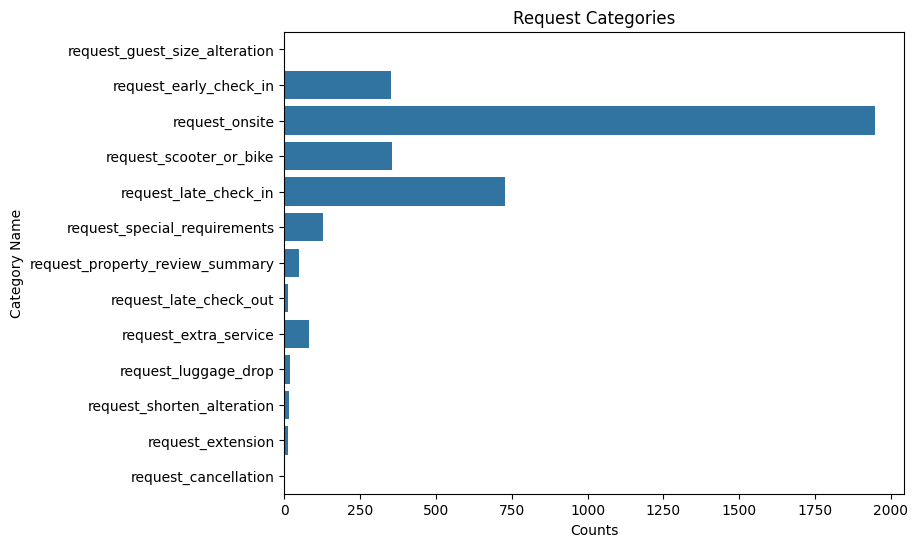

In [64]:
# plot the category_name by counts
plt.figure(figsize=(8, 6))
sns.countplot(y='category_name', data=request)
plt.ylabel('Category Name')
plt.xlabel('Counts')
plt.title('Request Categories')
plt.show()

In [65]:
# save request as json
request.to_csv('dataset/request.csv', index=False)

# uji coba 3

In [ ]:
import glob

# Path to the directory containing the CSV files
file_path = 'Bangkit Data/*.csv'

# Load all CSV files
all_files = glob.glob(file_path)

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over the list of files and read each CSV file
chunksize = 1000
for file in all_files:
    for chunk in pd.read_csv(file, chunksize=chunksize):
        dfs.append(chunk)
# for file in all_files:
#     df = pd.read_csv(file)
#     dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

# Display the shape of the combined DataFrame
df.shape


In [ ]:
df.info()

In [69]:
df.isnull().sum()

id                          0
user_id                     0
agent_name                  0
last_message               60
final_answer             2992
escalation_status         452
prompt_arguments          666
prompt_response           666
state_id                  666
state_name                666
category_id             19570
category_name           19570
category_description    19570
category_summary        19570
category_actions        19570
tool_id                 20324
tool_name               20324
tool_arguments          20324
tool_response           20450
created_at                  0
updated_at                  0
dtype: int64

In [70]:
df['category_name'].value_counts()

category_name
query_property_information          17717
request_onsite                       9260
request_extra_service                6976
request_early_check_in               5219
request_extension                    4807
information_guest_id                 4392
request_late_check_in                3736
query_transportation                 3543
query_property_availability          3121
request_special_requirements         2911
request_shorten_alteration           2706
request_scooter_or_bike              2703
information_arrival_time             2654
query_guest_information              2321
request_late_check_out               2087
request_luggage_drop                 1778
query_arrival_time                   1205
query_places                         1069
query_check_out_time                  835
request_cancellation                  552
information_check_out_time            532
query_guest_number                    478
query_company_guidelines              410
query_check_booking 

In [71]:
# Filter rows where the category_name is 'request_onsite'
onsite_requests = df[df['category_name'] == 'request_onsite']

# Display the first few rows of onsite requests
onsite_requests.head()


,id,user_id,agent_name,last_message,final_answer,escalation_status,prompt_arguments,prompt_response,state_id,state_name,...,category_name,category_description,category_summary,category_actions,tool_id,tool_name,tool_arguments,tool_response,created_at,updated_at
25,22722,HMPRWNECHN,Hosting,"Thank you, I left my used towels outside. Can ...","Hi Ianna,\n\nI've noted your request for a bed...",2.0,"{""user"": ""guest-confirmed-HMPRWNECHN-202405100...","{""data"": {""cost"": 46.365, ""completion"": {""inde...",1.0,goal-setting,...,request_onsite,For guest requests related to amenities such a...,The guest requested to have their bedsheets ch...,Coordinate with onsite staff for change of bed...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HMPRWNECHN"", ""guest_request_in...","{'information': ""Message has been sent to staf...",2024-05-10 00:27:10,2024-05-10 00:27:43
26,22722,HMPRWNECHN,Hosting,"Thank you, I left my used towels outside. Can ...","Hi Ianna,\n\nI've noted your request for a bed...",2.0,"{""user"": ""guest-confirmed-HMPRWNECHN"", ""model""...","{""data"": {""cost"": 43.11, ""completion"": {""index...",2.0,tool-calling,...,request_onsite,For guest requests related to amenities such a...,The guest requested to have their bedsheets ch...,Coordinate with onsite staff for change of bed...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HMPRWNECHN"", ""guest_request_in...","{'information': ""Message has been sent to staf...",2024-05-10 00:27:10,2024-05-10 00:27:43
27,22722,HMPRWNECHN,Hosting,"Thank you, I left my used towels outside. Can ...","Hi Ianna,\n\nI've noted your request for a bed...",2.0,"{""user"": null, ""model"": ""gpt-3.5-turbo-0125"", ...","{""data"": {""cost"": 1.245, ""completion"": {""index...",5.0,tool-execution,...,request_onsite,For guest requests related to amenities such a...,The guest requested to have their bedsheets ch...,Coordinate with onsite staff for change of bed...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HMPRWNECHN"", ""guest_request_in...","{'information': ""Message has been sent to staf...",2024-05-10 00:27:10,2024-05-10 00:27:43
28,22722,HMPRWNECHN,Hosting,"Thank you, I left my used towels outside. Can ...","Hi Ianna,\n\nI've noted your request for a bed...",2.0,"{""user"": ""guest-confirmed-HMPRWNECHN"", ""model""...","{""data"": {""cost"": 881.25, ""completion"": {""inde...",3.0,generate-answer,...,request_onsite,For guest requests related to amenities such a...,The guest requested to have their bedsheets ch...,Coordinate with onsite staff for change of bed...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HMPRWNECHN"", ""guest_request_in...","{'information': ""Message has been sent to staf...",2024-05-10 00:27:10,2024-05-10 00:27:43
29,22722,HMPRWNECHN,Hosting,"Thank you, I left my used towels outside. Can ...","Hi Ianna,\n\nI've noted your request for a bed...",2.0,"{""user"": ""guest-confirmed-HMPRWNECHN"", ""model""...","{""data"": {""cost"": 53.385000000000005, ""complet...",4.0,validate-answer,...,request_onsite,For guest requests related to amenities such a...,The guest requested to have their bedsheets ch...,Coordinate with onsite staff for change of bed...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HMPRWNECHN"", ""guest_request_in...","{'information': ""Message has been sent to staf...",2024-05-10 00:27:10,2024-05-10 00:27:43


In [72]:
print(onsite_requests['escalation_status'].value_counts())
print(onsite_requests['state_name'].value_counts())

escalation_status
2.0    7095
3.0    2159
Name: count, dtype: int64
state_name
validate-answer    2055
tool-execution     2053
generate-answer    2053
tool-calling       1703
goal-setting       1396
Name: count, dtype: int64


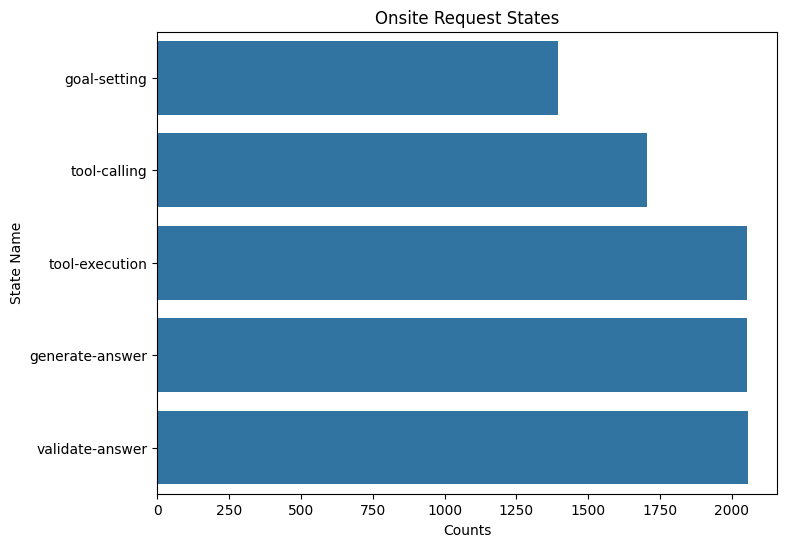

In [73]:
# plot the state_name by counts
plt.figure(figsize=(8, 6))
sns.countplot(y='state_name', data=onsite_requests)
plt.ylabel('State Name')
plt.xlabel('Counts')
plt.title('Onsite Request States')
plt.show()

In [74]:
onsite_requests.isnull().sum()
onsite_requests.dropna(inplace=True)

C:\Users\Mochammad Dzahwan\AppData\Local\Temp\ipykernel_3912\951670900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onsite_requests.dropna(inplace=True)


In [75]:
onsite_requests.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9087 entries, 25 to 103870
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9087 non-null   int64  
 1   user_id               9087 non-null   object 
 2   agent_name            9087 non-null   object 
 3   last_message          9087 non-null   object 
 4   final_answer          9087 non-null   object 
 5   escalation_status     9087 non-null   float64
 6   prompt_arguments      9087 non-null   object 
 7   prompt_response       9087 non-null   object 
 8   state_id              9087 non-null   float64
 9   state_name            9087 non-null   object 
 10  category_id           9087 non-null   float64
 11  category_name         9087 non-null   object 
 12  category_description  9087 non-null   object 
 13  category_summary      9087 non-null   object 
 14  category_actions      9087 non-null   object 
 15  tool_id               9

In [76]:
# as some message is repeat 5 time for every state name. so filter only 1 state and drop duplicate
onsite_requests = onsite_requests[onsite_requests['state_name'] == 'tool-execution']
onsite_requests.drop_duplicates(inplace=True)
print(onsite_requests.shape)

(1975, 21)


In [77]:
# extract response type
# Ensure the 'tool_response' column is filled with empty strings where there are NaNs
onsite_requests.loc[:,'tool_response'] = onsite_requests['tool_response'].fillna('')

# Apply function to extract response type, and use .loc to avoid SettingWithCopyWarning
onsite_requests = onsite_requests.copy()
onsite_requests.loc[:,'response_type'] = onsite_requests['tool_response'].apply(extract_response_type)

# count the number of sent and not sent
total_sent_requests = onsite_requests[onsite_requests['response_type'] == 'Sent'].shape[0]
total_not_sent_requests = onsite_requests[onsite_requests['response_type'] == 'Not Sent'].shape[0]
total_unkown_requests = onsite_requests[onsite_requests['response_type'] == 'Unknown'].shape[0]

print("Sent Count:", total_sent_requests)
print("Not Sent Count:", total_not_sent_requests)
print("Unknown Count:", total_unkown_requests)

Sent Count: 1281
Not Sent Count: 681
Unknown Count: 13


In [78]:
# Calculate percentages
total_requests = total_sent_requests + total_not_sent_requests
sent_percentage = (total_sent_requests / total_requests) * 100
not_sent_percentage = (total_not_sent_requests / total_requests) * 100

print("Sent Percentage:", sent_percentage)
print("Not Sent Percentage:", not_sent_percentage)


Sent Percentage: 65.29051987767585
Not Sent Percentage: 34.70948012232416


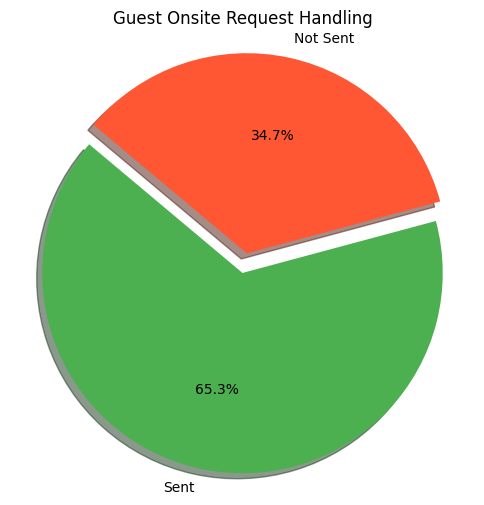

In [79]:
import matplotlib.pyplot as plt

# Pie chart for sent and not sent requests
labels = ['Sent', 'Not Sent']
sizes = [sent_percentage, not_sent_percentage]
colors = ['#4CAF50', '#FF5733']
explode = (0.1, 0)  # explode the 1st slice

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Guest Onsite Request Handling')
plt.show()


In [80]:
onsite_requests.head()

,id,user_id,agent_name,last_message,final_answer,escalation_status,prompt_arguments,prompt_response,state_id,state_name,...,category_description,category_summary,category_actions,tool_id,tool_name,tool_arguments,tool_response,created_at,updated_at,response_type
27,22722,HMPRWNECHN,Hosting,"Thank you, I left my used towels outside. Can ...","Hi Ianna,\n\nI've noted your request for a bed...",2.0,"{""user"": null, ""model"": ""gpt-3.5-turbo-0125"", ...","{""data"": {""cost"": 1.245, ""completion"": {""index...",5.0,tool-execution,...,For guest requests related to amenities such a...,The guest requested to have their bedsheets ch...,Coordinate with onsite staff for change of bed...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HMPRWNECHN"", ""guest_request_in...","{'information': ""Message has been sent to staf...",2024-05-10 00:27:10,2024-05-10 00:27:43,Sent
205,22742,HMKBE38MJE,Hosting,I clicked.on the link now not working,"Hi Khaled,\n\nI apologize for the troubles the...",2.0,"{""user"": null, ""model"": ""gpt-3.5-turbo-0125"", ...","{""data"": {""cost"": 1.5824999999999998, ""complet...",5.0,tool-execution,...,For guest requests related to amenities such a...,The user is asking about the category.,Ask for more details or context about the imag...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HMKBE38MJE"", ""guest_request_in...","{'information': ""Message has been sent to staf...",2024-05-10 01:26:57,2024-05-10 01:27:34,Sent
401,22768,HMXJSDJ3F4,Hosting,"Hi!\nI forgot I phone charger, do you have one?","Hi Léonard,\n\nWe understand how essential you...",2.0,"{""user"": null, ""model"": ""gpt-3.5-turbo-0125"", ...","{""data"": {""cost"": 1.4925000000000002, ""complet...",5.0,tool-execution,...,For guest requests related to amenities such a...,The guest is inquiring about needing an iPhone...,Offer assistance for the guest's forgotten iPh...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HMXJSDJ3F4"", ""guest_request_in...",{'information': 'Message has been sent to staf...,2024-05-10 02:20:52,2024-05-10 02:21:13,Sent
425,22773,HMEX9CCPRT,Hosting,Do you have option to provide scooter and/or b...,"Hi Alain,\n\nThank you for reaching out. I've ...",2.0,"{""user"": null, ""model"": ""gpt-3.5-turbo-0125"", ...","{""data"": {""cost"": 1.74, ""completion"": {""index""...",5.0,tool-execution,...,For guest requests related to amenities such a...,Alain reported that lights in two rooms are no...,Assist with the lights issue in two rooms and ...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HMEX9CCPRT"", ""guest_request_in...",{'information': 'Message has been sent to staf...,2024-05-10 02:24:56,2024-05-10 02:25:50,Sent
426,22773,HMEX9CCPRT,Hosting,Do you have option to provide scooter and/or b...,"Hi Alain,\n\nThank you for reaching out. I've ...",2.0,"{""user"": null, ""model"": ""gpt-3.5-turbo-0125"", ...","{""data"": {""cost"": 1.74, ""completion"": {""index""...",5.0,tool-execution,...,For guest requests related to amenities such a...,Alain reported that lights in two rooms are no...,Assist with the lights issue in two rooms and ...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HMEX9CCPRT"", ""guest_request_in...",{'information': 'Message was not sent because ...,2024-05-10 02:24:56,2024-05-10 02:25:50,Not Sent


In [81]:
# Convert 'created_at' to datetime
onsite_requests['created_at'] = pd.to_datetime(onsite_requests['created_at'])
onsite_requests.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1975 entries, 27 to 103851
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    1975 non-null   int64         
 1   user_id               1975 non-null   object        
 2   agent_name            1975 non-null   object        
 3   last_message          1975 non-null   object        
 4   final_answer          1975 non-null   object        
 5   escalation_status     1975 non-null   float64       
 6   prompt_arguments      1975 non-null   object        
 7   prompt_response       1975 non-null   object        
 8   state_id              1975 non-null   float64       
 9   state_name            1975 non-null   object        
 10  category_id           1975 non-null   float64       
 11  category_name         1975 non-null   object        
 12  category_description  1975 non-null   object        
 13  category_summary    

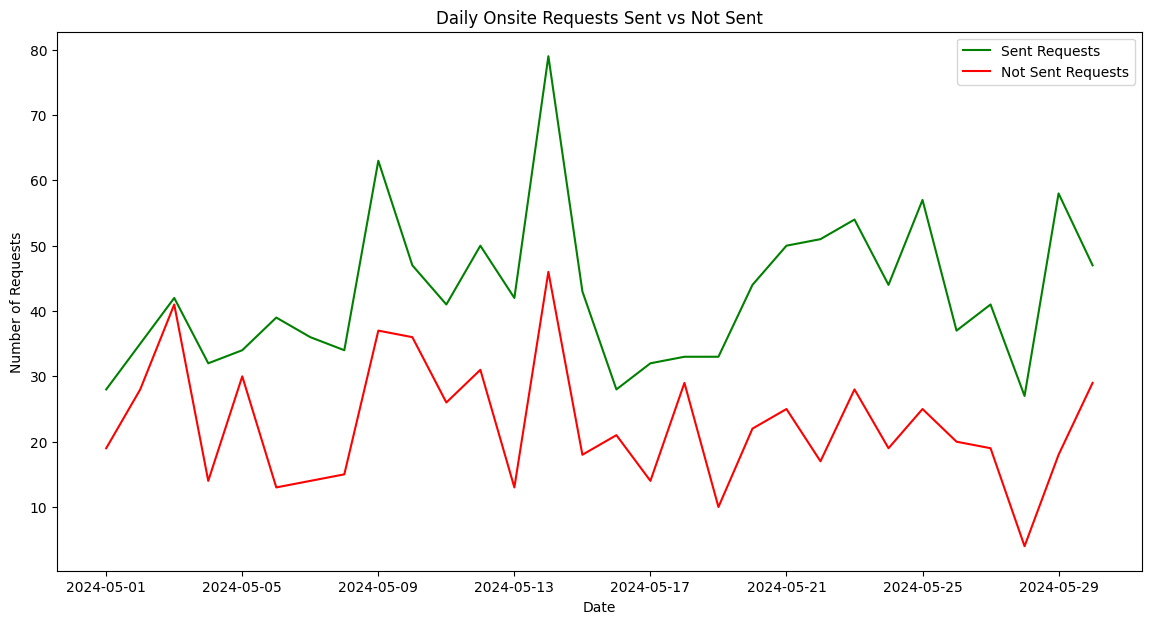

In [82]:
# # Convert 'created_at' to datetime

# Set the created_at as the index
onsite_requests.set_index('created_at', inplace=True)

# Resample by day and count sent and not sent requests
daily_sent = onsite_requests[onsite_requests['response_type'] == 'Sent'].resample('D').size()
daily_not_sent = onsite_requests[onsite_requests['response_type'] == 'Not Sent'].resample('D').size()

# Plot the frequency over time
plt.figure(figsize=(14, 7))
plt.plot(daily_sent, label='Sent Requests', color='green')
plt.plot(daily_not_sent, label='Not Sent Requests', color='red')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.title('Daily Onsite Requests Sent vs Not Sent')
plt.legend()
plt.show()


In [83]:
# make new table count of sent and not sent for each created_at
daily_counts = onsite_requests.groupby([onsite_requests.index.date, 'response_type']).size().unstack()
daily_counts.fillna(0, inplace=True)

# sort daily counts by maximum in sent
daily_counts = daily_counts.sort_values('Sent', ascending=False)
daily_counts

response_type,Not Sent,Sent,Unknown
2024-05-14,46.0,79.0,0.0
2024-05-09,37.0,63.0,0.0
2024-05-29,18.0,58.0,1.0
2024-05-25,25.0,57.0,2.0
2024-05-23,28.0,54.0,0.0
2024-05-22,17.0,51.0,0.0
2024-05-21,25.0,50.0,0.0
2024-05-12,31.0,50.0,0.0
2024-05-10,36.0,47.0,0.0
2024-05-30,29.0,47.0,0.0


In [84]:
drop_col = ['tool_id', 'tool_name', 'tool_arguments', 'prompt_arguments', 'prompt_response', 'category_id', 'category_description', 'state_name', 'state_id']
onsite_requests.drop(columns=drop_col, inplace=True)
onsite_requests.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1975 entries, 2024-05-10 00:27:10 to 2024-05-09 23:07:31
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1975 non-null   int64  
 1   user_id            1975 non-null   object 
 2   agent_name         1975 non-null   object 
 3   last_message       1975 non-null   object 
 4   final_answer       1975 non-null   object 
 5   escalation_status  1975 non-null   float64
 6   category_name      1975 non-null   object 
 7   category_summary   1975 non-null   object 
 8   category_actions   1975 non-null   object 
 9   tool_response      1975 non-null   object 
 10  updated_at         1975 non-null   object 
 11  response_type      1975 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 200.6+ KB


# uji 4

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the dataset
hermes_process_logs = pd.read_csv('dataset/hermes_process_logs.csv')

# Check for missing values in 'last_message' and 'final_answer'
hermes_process_logs['last_message'].fillna('', inplace=True)
hermes_process_logs['final_answer'].fillna('', inplace=True)

# Combine 'last_message' and 'final_answer' into a single column for analysis
hermes_process_logs['combined_message'] = hermes_process_logs['last_message'] + ' ' + hermes_process_logs['final_answer']

# Tokenization and Frequency Analysis
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(hermes_process_logs['combined_message'])
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Get the top 20 most frequent words
top_words = word_counts.sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_words.values, y=top_words.index, orient='h')
plt.title('Top 20 Most Frequent Words in Messages')
plt.xlabel('Frequency')
plt.show()

# Sentiment Analysis
sid = SentimentIntensityAnalyzer()
hermes_process_logs['sentiment_scores'] = hermes_process_logs['combined_message'].apply(lambda x: sid.polarity_scores(x))
hermes_process_logs['sentiment'] = hermes_process_logs['sentiment_scores'].apply(lambda x: 'positive' if x['compound'] > 0 else ('negative' if x['compound'] < 0 else 'neutral'))

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=hermes_process_logs)
plt.title('Sentiment Distribution of Messages')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()

# Analysis by Category
category_sentiment = hermes_process_logs.groupby('category_name')['sentiment'].value_counts(normalize=True).unstack().fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(category_sentiment, annot=True, fmt='.2%', cmap='coolwarm')
plt.title('Sentiment Distribution by Category')
plt.xlabel('Sentiment')
plt.ylabel('Category')
plt.show()

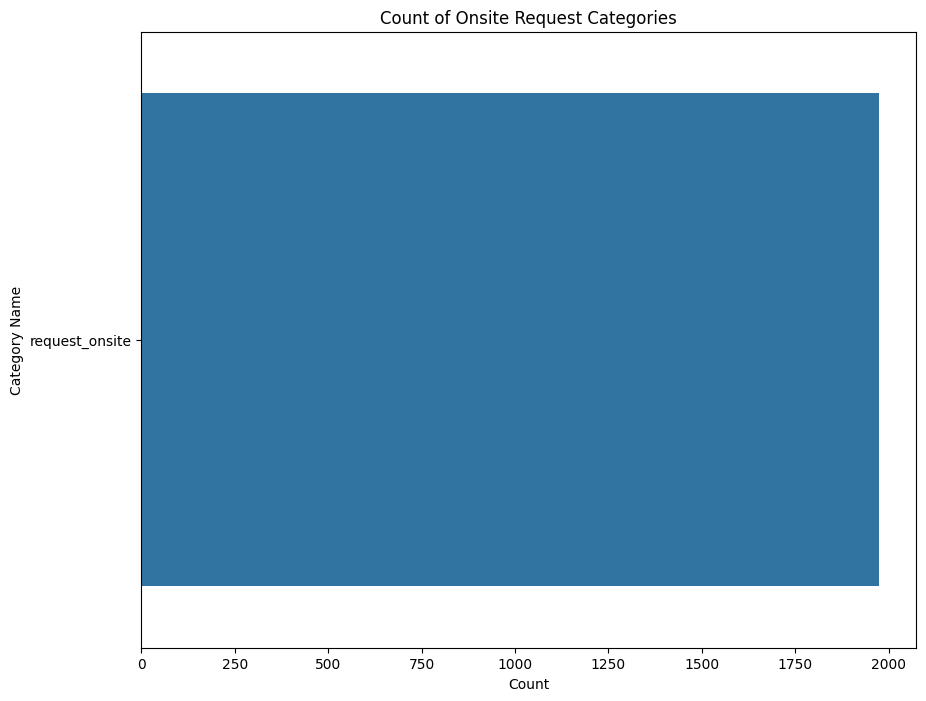

In [85]:
plt.figure(figsize=(10, 8))
sns.countplot(y='category_name', data=onsite_requests, order=onsite_requests['category_name'].value_counts().index)
plt.title('Count of Onsite Request Categories')
plt.xlabel('Count')
plt.ylabel('Category Name')
plt.show()

In [86]:
# Descriptive statistics
desc_stats = onsite_requests.describe(include='all')
print(desc_stats)

                 id     user_id agent_name last_message  \
count    1975.00000        1975       1975         1975   
unique          NaN         556          1          895   
top             NaN  HM49ZD3JBF    Hosting        image   
freq            NaN          20       1975           59   
mean    25813.60557         NaN        NaN          NaN   
std      4421.01823         NaN        NaN          NaN   
min     17767.00000         NaN        NaN          NaN   
25%     22426.00000         NaN        NaN          NaN   
50%     25557.00000         NaN        NaN          NaN   
75%     29569.00000         NaN        NaN          NaN   
max     33226.00000         NaN        NaN          NaN   

                                             final_answer  escalation_status  \
count                                                1975        1975.000000   
unique                                               1028                NaN   
top     Hi Jian HongWei,\n\nI'm glad to confirm tha

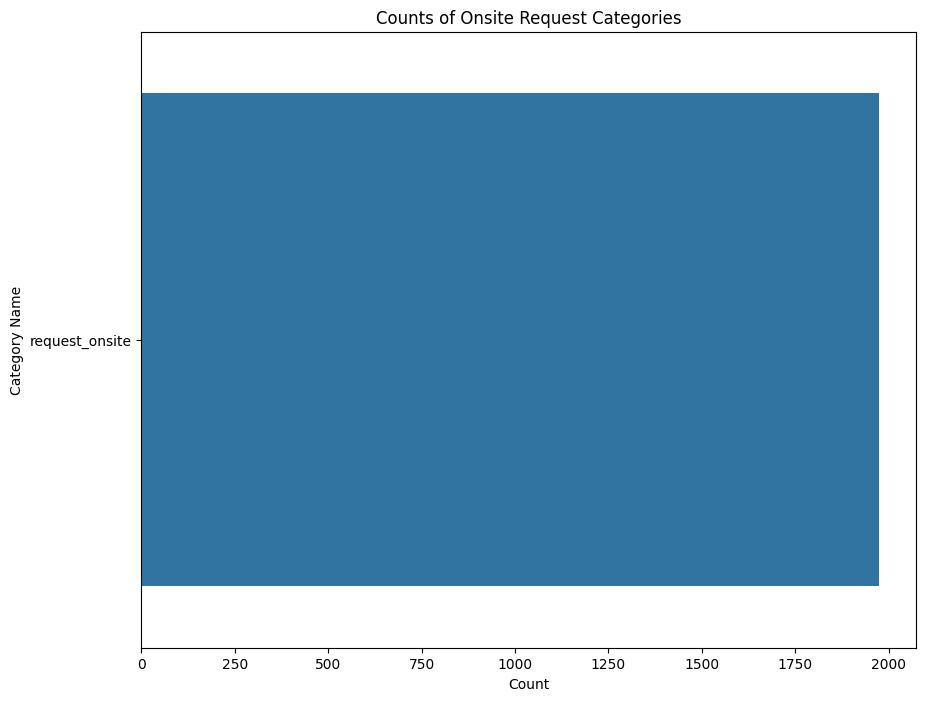

In [87]:
# Group by category_name and count
category_counts = onsite_requests['category_name'].value_counts().reset_index()
category_counts.columns = ['category_name', 'count']

# Plot the counts
plt.figure(figsize=(10, 8))
sns.barplot(x='count', y='category_name', data=category_counts)
plt.title('Counts of Onsite Request Categories')
plt.xlabel('Count')
plt.ylabel('Category Name')
plt.show()

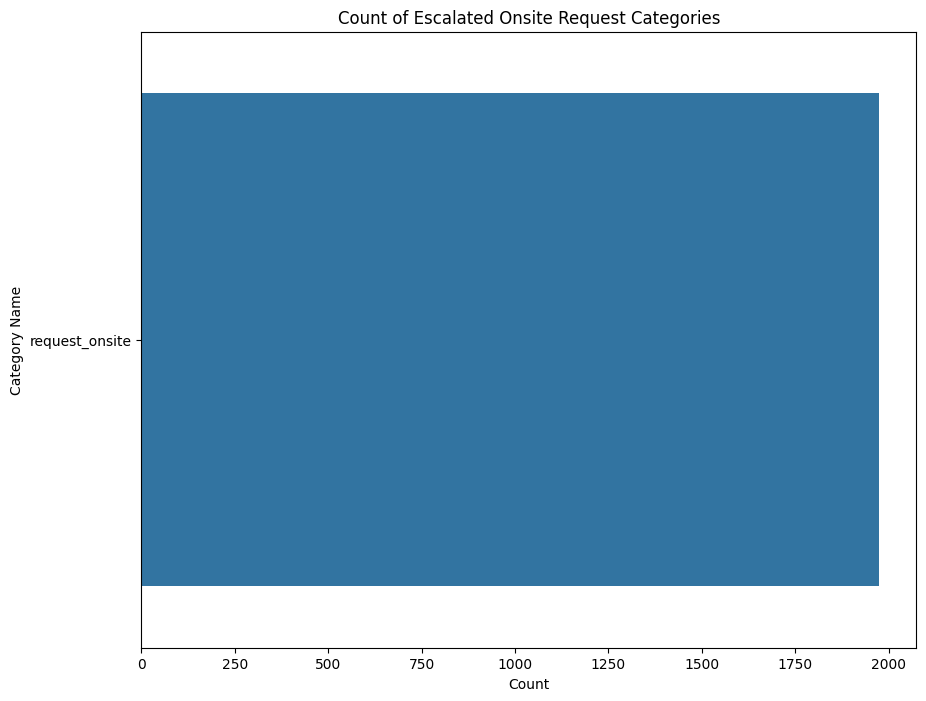

In [88]:
# Filter for requests with escalation status > 1
escalated_requests = onsite_requests[onsite_requests['escalation_status'] > 1]

# Bar chart for escalated request categories
plt.figure(figsize=(10, 8))
sns.countplot(y='category_name', data=escalated_requests, order=escalated_requests['category_name'].value_counts().index)
plt.title('Count of Escalated Onsite Request Categories')
plt.xlabel('Count')
plt.ylabel('Category Name')
plt.show()

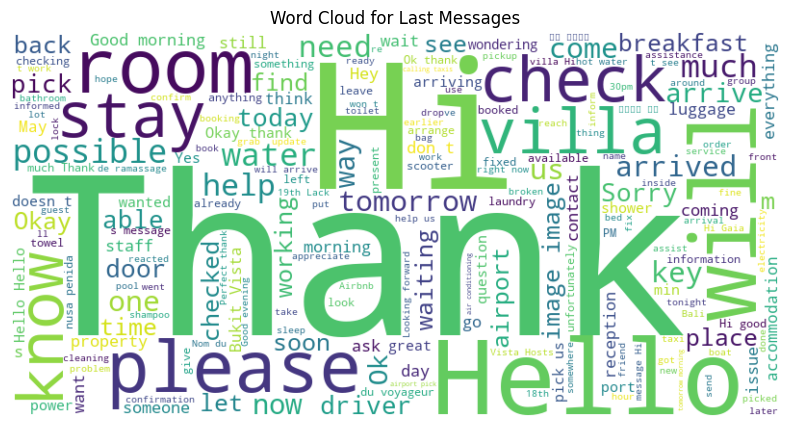

In [89]:
from wordcloud import WordCloud

# Generate word cloud for last_message
text = " ".join(review for review in onsite_requests.last_message.dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Last Messages')
plt.show()

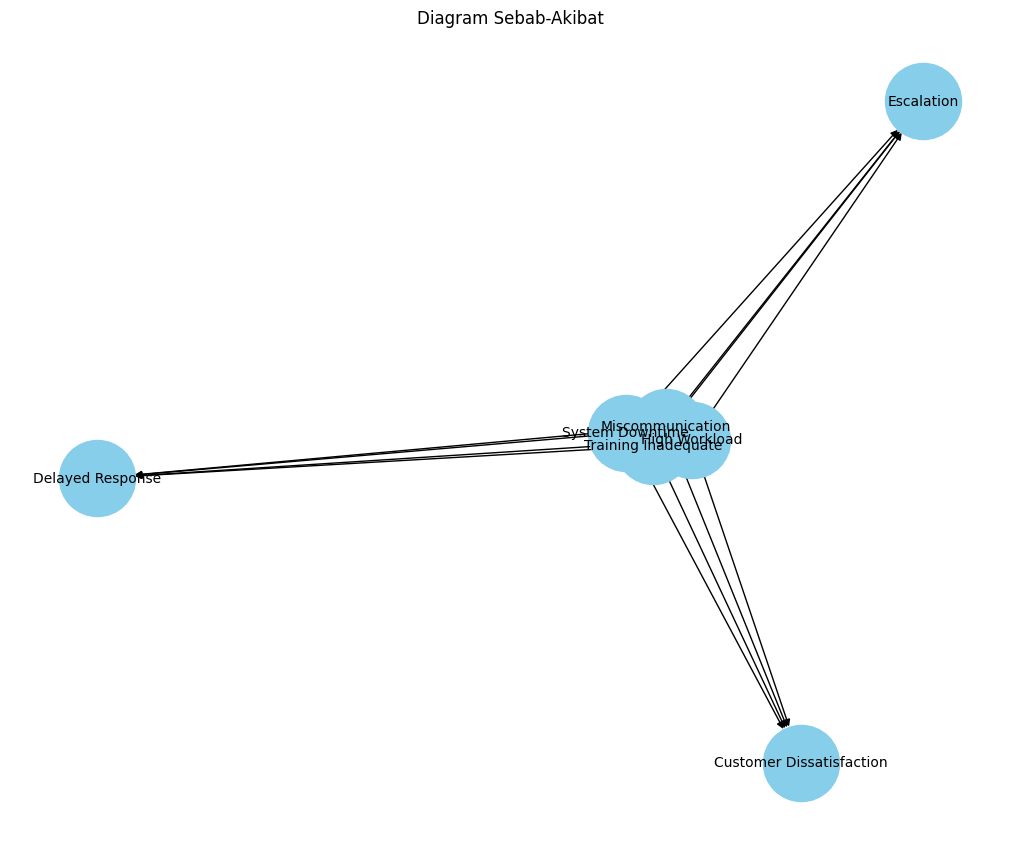

In [90]:
import matplotlib.pyplot as plt
import networkx as nx

# Contoh sederhana diagram sebab-akibat
G = nx.DiGraph()

# Tambahkan nodes dan edges
causes = ['Training Inadequate', 'System Downtime', 'High Workload', 'Miscommunication']
effects = ['Escalation', 'Delayed Response', 'Customer Dissatisfaction']

for cause in causes:
    for effect in effects:
        G.add_edge(cause, effect)

# Visualisasi diagram sebab-akibat
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_color='black')
plt.title('Diagram Sebab-Akibat')
plt.show()

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Persiapan data
X = onsite_requests['last_message']
y = onsite_requests['category_name']

# Text vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X_vectorized = vectorizer.fit_transform(X.dropna())

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y.dropna(), test_size=0.2, random_state=42)

# Model building
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

request_onsite       1.00      1.00      1.00       395

      accuracy                           1.00       395
     macro avg       1.00      1.00      1.00       395
  weighted avg       1.00      1.00      1.00       395



In [94]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Build the model with best parameters
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Evaluate again
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
                precision    recall  f1-score   support

request_onsite       1.00      1.00      1.00       395

      accuracy                           1.00       395
     macro avg       1.00      1.00      1.00       395
  weighted avg       1.00      1.00      1.00       395



In [95]:
import joblib

# Save the model
joblib.dump(best_model, 'onsite_request_classifier.pkl')

# Load the model (in production environment)
loaded_model = joblib.load('onsite_request_classifier.pkl')

# Predict using loaded model
new_data_vectorized = vectorizer.transform(["New request message here"])
prediction = loaded_model.predict(new_data_vectorized)
print("Predicted Category:", prediction)

Predicted Category: ['request_onsite']


In [96]:
from sklearn.metrics import accuracy_score

# Function to monitor model performance
def monitor_model_performance(true_labels, predictions):
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Current model accuracy: {accuracy:.2f}")
    # Log the accuracy or send it to monitoring tool
    # Example: send_to_monitoring_tool('model_accuracy', accuracy)

# Call this function periodically after getting predictions
monitor_model_performance(y_test, y_pred)

Current model accuracy: 1.00
